# Progetto Finale Data Science - Travel

**Il tuo compito sarà seguire ogni punto e commentarlo, mostrandomi di aver capito cosa tu stia facendo. Se alcuni punti si rivelano impossibili spiegami la motivazione. Troverai probabilmente alcuni modelli o tecniche che non hai propriamente studiato. Non preoccuparti, la sperimentazione, la scoperta e il continuo aggiornamento fanno parte del gioco. CANCELLA QUESTO MESSAGGIO PRIMA DI CARICARE IL PROGETTO**

In questo progetto si analizzerà un dataset sulla soddisfazione dei clienti di una compagnia aerea.

l'obiettivo è **poter prevedere la soddisfazione degli utenti in base a dei parametri sulla soddisfazione dei servizi della compagnia aerea**

## EDA (Exploratory data analysis)

### EXPLORATORY ANALYSIS

in questo progetto verrano caricati due dataset, uno per il training ed uno per il test, fornito dalla traccia su start2impact:

saranno caricati tutte le librerie python che verranno utilizzate in questo progetto:

In [1]:
import pandas as pd
from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, KBinsDiscretizer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from scipy.stats import chi2_contingency


pd.set_option('display.max_columns', None)



S'importa i due csv forniti dalla traccia su start2impact. E' stato utilizzato il codice sotto perchè per la creazione del progetto è stato utilizzato con la piattaforma cloud di google Colab:

In [2]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [4]:
df_train.shape, df_test.shape

((103904, 25), (25976, 25))

si puoi analizzare che sommando la grandezza dei 2 dataset, il training set rappresenta il 80% dei dati mentre il training set rappresenta il 20% dei dati.

Viene dato un primo sguardo ai dati del dataset di training

In [5]:
display(df_train.head(), df_test.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
display(df_train.describe(), df_test.describe())

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [7]:
display(df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

None

None

Si può osservare che il dataset è composto da 25 variabili (incluso il target chiamato *satisfaction*) diviso in:
1. 5 variabili categoriche (compreso il target)
2. 20 variabili numeriche

Tra le variabili numeriche, tutte sono di tipo intero tranne la variabile 'Arrival Delay in Minutes'. analizzando i primi valori, nel passo precedente, non sembra esserci numeri decimali, nella fase di feature engineering si potrebbe fare una piccola analisi su questa variabile e poter cambiare il tipo. Trasformarla ad intero può aiutare ad avere una chiarezza dei dati, inoltre, dal nome della variabile si evince che i valori inseriti sono minuti, quindi è improbabile che venga inserito un valore decimale se si registrano solo i minuti di ritardo dell'arrivo dell'aereo

viene dato uno sguardo alle colonne presenti:

In [8]:
display(df_train.columns, df_test.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

viene dato uno sguardo ai valori unici presenti in ogni colonna:

In [9]:
display(df_train.nunique())
display("valori unici nel test set: ")
display(df_test.nunique())



Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

'valori unici nel test set: '

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

In [10]:
for column in df_train.columns:
    unique_value = df_train[column].unique()
    print(f"Valori presenti nella variabile '{column}' unici: {unique_value}")

Valori presenti nella variabile 'Unnamed: 0' unici: [     0      1      2 ... 103901 103902 103903]
Valori presenti nella variabile 'id' unici: [ 70172   5047 110028 ...  68825  54173  62567]
Valori presenti nella variabile 'Gender' unici: ['Male' 'Female']
Valori presenti nella variabile 'Customer Type' unici: ['Loyal Customer' 'disloyal Customer']
Valori presenti nella variabile 'Age' unici: [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Valori presenti nella variabile 'Type of Travel' unici: ['Personal Travel' 'Business travel']
Valori presenti nella variabile 'Class' unici: ['Eco Plus' 'Business' 'Eco']
Valori presenti nella variabile 'Flight Distance' unici: [ 460  235 1142 ...  974 1479  400]
Valori presenti nella variabile 'Inflight wifi service' unici: [3 2 4 1 5 0]
Valori presenti nella variabile 

Questa analisi evidenzia una vasta gamma di valori nel dataset, che variano da 0 a 1500. Inoltre, si osserva una notevole disparità nei valori delle diverse variabili, ad esempio, 'Arrival Delay in Minutes' e 'Seat comfort' presentano valori molto diversi tra loro. Nei successivi step si implementeranno delle soluzioni di standardizzazione delle variabili

Nell'analisi dei valori unici delle variabili, nello step precedente e questa analisi,  si osserva che numerose variabili:

1. Inflight wifi service                    
2. Departure/Arrival time convenient        
3. Ease of Online booking                   
4. Gate location                            
5. Food and drink                           
6. Online boarding                          
7. Seat comfort                             
8. Inflight entertainment                   
9. On-board service                         
10. Leg room service                         
11. Baggage handling                         
12. Checkin service                          
13. Inflight service                         
14. Cleanliness

presentano valori compresi tra 0 e 5. Questi valori sembrano rappresentare le valutazioni dei servizi offerti dalla compagnia aerea, dal cibo e bibite offerte, dalla comodità dei sedili, dalla pulizia alla facilità della prenotazione online. Si potrebbe considerare la possibilità di sintetizzare queste variabili in un'unica misura che rifletta l'esperienza complessiva del cliente con i servizi della compagnia aerea.

Si analizzano le variabili categoriche:

In [11]:
for column in df_train.columns:
    unique_value = df_train[column].unique()
    if df_train[column].dtype == 'object':
      print(f"Valori presenti nella variabile '{column}' unici: {unique_value}")

Valori presenti nella variabile 'Gender' unici: ['Male' 'Female']
Valori presenti nella variabile 'Customer Type' unici: ['Loyal Customer' 'disloyal Customer']
Valori presenti nella variabile 'Type of Travel' unici: ['Personal Travel' 'Business travel']
Valori presenti nella variabile 'Class' unici: ['Eco Plus' 'Business' 'Eco']
Valori presenti nella variabile 'satisfaction' unici: ['neutral or dissatisfied' 'satisfied']


Ad eccezione della variabile target satisfaction, analizziamo le variabili categoriche in cui esiste una relazione d'ordine. La più ovvia è la variabile 'Class', dove si può presumere che Eco < Eco Plus < Business. Le restanti sono variabili categoriche nominali, cioè variabili distinte senza un significato intrinseco nell'ordinare le categorie. Nei successivi step si implementeranno delle tecniche che trasformano le variabili categoriche ordinali e nominali in forma numerica perchè può migliorare le prestazione del modello di apprendimento fornendo maggiori informazioni sulle variabili categoriche e può aiutare a evitare il problema dell'ordinalità, che potrebbe verificarsi in questo progetto con la variabile *Class*

Si controlla se il dataset è bilanciato:

<Axes: xlabel='satisfaction', ylabel='count'>

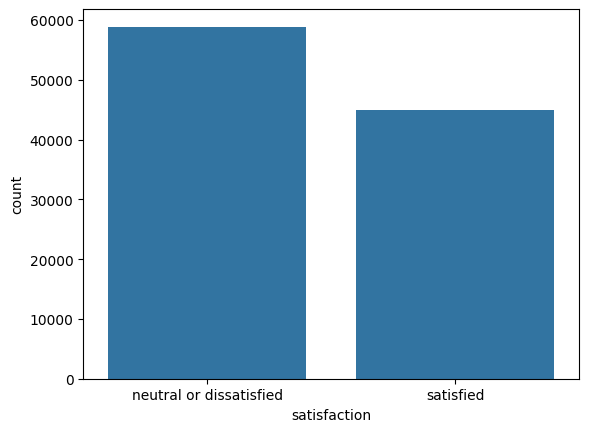

In [12]:
sns.countplot(df_train, x="satisfaction")

<Axes: xlabel='satisfaction', ylabel='count'>

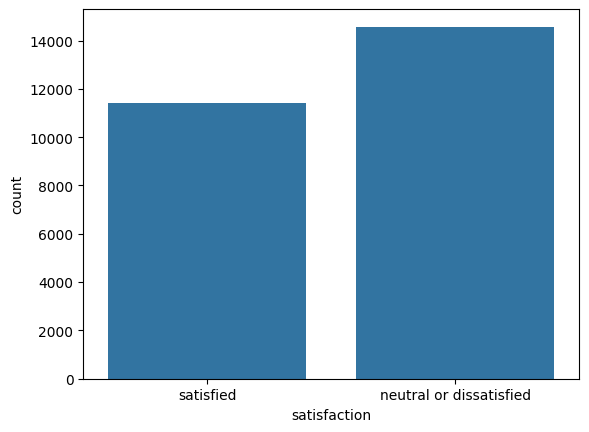

In [13]:
sns.countplot(df_test, x="satisfaction")


Dal target evince che sarà un problema di classificazione binario poichè sono presenti solo 2 valori (*satisfied* e *neutral or dissatisfied*). In entrambi i dataset non c'è bilanciamento tra le due categorie:
1. nel training set la categoria *neutral or dissatisfied* ha circa 15k di valori in più rispetto alla categoria *satisfied*
2. nel test set la categoria *neutral or dissatisfied* ha circa 2k di valori in più rispetto alla categoria *satisfied*

Tutto ciò potrebbe comportare dei problemi di precisione nella classe minoritaria, ovvero nella categoria *satisfied*. Per gestire questo problema, si utilizzeranno dei modelli di apprendimento *ensemble methods*, ovvero si combineranno più modelli di apprendimento per migliorare le prestazioni complessive del classificatore, come ad esempio *Adaboost* e *RandomForest*


### DATA PREPROCESSING

Dopo aver dato un primo sguardo al dataset, si può proseguire con il data cleaning:

In questa fase verranno applicate modifiche sia al training che al test set, quindi su tutto il dataset, per vari motivi:
1.  **Errate interpretazioni delle relazioni tra variabili**: La presenza di dati sporchi o mancanti nel training set può portare a distorcere le relazioni tra le variabili.

2.   **Visualizzazioni fuorvianti**: Dati non puliti possono generare grafici che non riflettono accuratamente le distribuzioni e le tendenze reali dei dati, portando a interpretazioni errate.

3.   **Destabilizzazione dei modelli**: Dati sporchi possono compromettere la stabilità dei modelli di apprendimento. Questo può portare a overfitting (modello troppo complesso che si adatta ai rumori del training set) o underfitting (modello troppo semplice che non cattura i pattern dei dati), riducendo la robustezza e la capacità di generalizzazione dei modelli (MOLTO PROBABILMENTE VERRà TOLTA QUESTA PARTE)

# PER IL MOMENTO NON CANCELLARE QUESTO TESTO PIU' IL TESTO INERENTE AL TEST SET, QUANDO UTILIZZERAI IL TEST SET PER FARE LA PREDIZIONE CAPISCI SE FUNZIONA








#### DATA REDUCTION

Si procede a eliminare le variabili non indispensabili o ridondanti in tutto il dataset come:

1. **Unnamed: 0**: Questa variabile assegna un ID a ogni riga. Tuttavia, utilizzando pandas, viene automaticamente creato un indice per ogni riga, rendendo questa variabile ridondante.
2. **id**: Questa variabile non è indispensabile per il progetto, in quanto non contribuisce all'analisi o alla costruzione del modello



In [14]:
df_train_feat_clean= df_train.drop(columns=["Unnamed: 0", "id"], axis=1)
df_test_feat_clean= df_test.drop(columns=["Unnamed: 0", "id"], axis=1)

df_train_feat_clean

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [15]:
df_test_feat_clean

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


### DATA CLEANING (DEVI CANCELLARE IL TITOLO DI SOPRA)

Si procede ad analizzare se sono presenti dei valori nulli (isnull()) o NaN (isna()), verrà effettuato un calcolo in percentuale per fare più chiarezza sui dati mancanti:

s'inizia con il test set :

In [16]:
def calculate_null_percentage(df):
  nan_df = (df.isna().sum() / len(df) ) * 100
  null_df = (df.isnull().sum() / len(df) ) * 100
  return nan_df, null_df

In [17]:
nan_df_test, null_df_test =  calculate_null_percentage(df_test_feat_clean)

nan_df_test, null_df_test


(Gender                               0.000000
 Customer Type                        0.000000
 Age                                  0.000000
 Type of Travel                       0.000000
 Class                                0.000000
 Flight Distance                      0.000000
 Inflight wifi service                0.000000
 Departure/Arrival time convenient    0.000000
 Ease of Online booking               0.000000
 Gate location                        0.000000
 Food and drink                       0.000000
 Online boarding                      0.000000
 Seat comfort                         0.000000
 Inflight entertainment               0.000000
 On-board service                     0.000000
 Leg room service                     0.000000
 Baggage handling                     0.000000
 Checkin service                      0.000000
 Inflight service                     0.000000
 Cleanliness                          0.000000
 Departure Delay in Minutes           0.000000
 Arrival Dela

È emerso che valori nulli o NaN sono presenti solo nella variabile *Arrival Delay in Minutes* e rappresentano quasi lo **0.32%** dei valori NaN e nulli, percentuali veramente basse

si analizza il training set:

In [18]:
nan_df_train, null_df_train =  calculate_null_percentage(df_train_feat_clean)

nan_df_train, null_df_train

(Gender                               0.000000
 Customer Type                        0.000000
 Age                                  0.000000
 Type of Travel                       0.000000
 Class                                0.000000
 Flight Distance                      0.000000
 Inflight wifi service                0.000000
 Departure/Arrival time convenient    0.000000
 Ease of Online booking               0.000000
 Gate location                        0.000000
 Food and drink                       0.000000
 Online boarding                      0.000000
 Seat comfort                         0.000000
 Inflight entertainment               0.000000
 On-board service                     0.000000
 Leg room service                     0.000000
 Baggage handling                     0.000000
 Checkin service                      0.000000
 Inflight service                     0.000000
 Cleanliness                          0.000000
 Departure Delay in Minutes           0.000000
 Arrival Dela

Anche nel training set, la variabile *Arrival Delay in Minutes* è l'unica variabile che ha valori nulli o NaN, i quali rappresentano quasi lo **0.30%** dei valori, una percentuale alquanto bassa. Si analizzano righe con valori nulli:

In [19]:

null_value = df_test_feat_clean.isna()
df_test_missing_val = df_test_feat_clean[null_value.any(axis=1)]

null_value = df_train_feat_clean.isna()
df_train_missing_val = df_train_feat_clean[null_value.any(axis=1)]

display(df_test_missing_val, df_train_missing_val)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,2,1,4,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,4,2,1,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,5,4,5,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,4,4,4,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,3,5,5,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,5,5,5,5,1,1,1,3,2,5,26,NaN,satisfied
24133,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,3,3,3,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,4,3,4,4,3,3,5,5,4,4,0,NaN,satisfied
25128,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,2,4,5,5,5,5,5,3,5,3,0,NaN,satisfied


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


È emerso che i valori nulli sono pochi rispetto al numero totale di valori nella variabile, sia nel training set che nel test set. Pertanto, si potrebbe considerare l'eliminazione delle righe contenenti valori nulli in entrambi i dataset, poiché la perdita di dati non influenzerebbe in modo significativo l'integrità dei dataset. Si utilizzerà il metodo *dropna()* su entrambi i dataset:

In [20]:
df_train_clean = df_train_feat_clean.dropna()
df_test_clean = df_test_feat_clean.dropna()

#viene effettuato il reset degli indici dopo aver cancellato le righe
df_train_clean = df_train_clean.reset_index(drop=True)
df_test_clean = df_test_clean.reset_index(drop=True)



Si effettua una controprova per stabilire che tutti i valori nulli sono stati eliminati:

In [21]:
nan_df_test, null_df_test =  calculate_null_percentage(df_test_clean)
nan_df_test, null_df_test

(Gender                               0.0
 Customer Type                        0.0
 Age                                  0.0
 Type of Travel                       0.0
 Class                                0.0
 Flight Distance                      0.0
 Inflight wifi service                0.0
 Departure/Arrival time convenient    0.0
 Ease of Online booking               0.0
 Gate location                        0.0
 Food and drink                       0.0
 Online boarding                      0.0
 Seat comfort                         0.0
 Inflight entertainment               0.0
 On-board service                     0.0
 Leg room service                     0.0
 Baggage handling                     0.0
 Checkin service                      0.0
 Inflight service                     0.0
 Cleanliness                          0.0
 Departure Delay in Minutes           0.0
 Arrival Delay in Minutes             0.0
 satisfaction                         0.0
 dtype: float64,
 Gender          

In [22]:
nan_df_train, null_df_train =  calculate_null_percentage(df_test_clean)

nan_df_train, null_df_train

(Gender                               0.0
 Customer Type                        0.0
 Age                                  0.0
 Type of Travel                       0.0
 Class                                0.0
 Flight Distance                      0.0
 Inflight wifi service                0.0
 Departure/Arrival time convenient    0.0
 Ease of Online booking               0.0
 Gate location                        0.0
 Food and drink                       0.0
 Online boarding                      0.0
 Seat comfort                         0.0
 Inflight entertainment               0.0
 On-board service                     0.0
 Leg room service                     0.0
 Baggage handling                     0.0
 Checkin service                      0.0
 Inflight service                     0.0
 Cleanliness                          0.0
 Departure Delay in Minutes           0.0
 Arrival Delay in Minutes             0.0
 satisfaction                         0.0
 dtype: float64,
 Gender          

I due dataset sono completamente puliti dai valori nulli

### FEATURE ENGINEERING

In questa fase verranno eseguite le varie soluzioni pensate durante la fase di esplorazione dei dati. Le modifiche verranno apportate sia al training set che al test set per vari motivi:

1. **Coerenza dei dati**: Applicare le stesse trasformazioni (ad esempio, standardizzazione, encoding) sia al training set che al test set assicura che i dati abbiano le stesse caratteristiche. Se si applica il feature engineering solo al training set, il modello potrebbe non funzionare correttamente sul test set a causa delle differenze nei dati.
2. **Stabilità dei modelli**: Se il test set viene trasformato in modo diverso rispetto al training set, può compromettere la stabilità dei modelli di apprendimento. Questo può portare a overfitting (modello troppo complesso che si adatta ai rumori del training set) o underfitting (modello troppo semplice che non cattura i pattern dei dati), riducendo la robustezza e la capacità di generalizzazione dei modelli.

Verrà esclusa la variabile target *satisfaction* per vari motivi:
1. **Rischio di Data Leakage**:
L'inclusione della variabile target nel feature engineering può portare a data leakage, dove le informazioni sulla variabile target influenzano inavvertitamente le trasformazioni o le caratteristiche del training set, portando a una valutazione erroneamente ottimistica delle prestazioni del modello.
2. **Focus sulle Caratteristiche Predittive**:
La fase di feature engineering si concentra sulla manipolazione delle caratteristiche del training set per migliorare le prestazioni del modello. La variabile target non fa parte di queste caratteristiche, poiché è l'output che stiamo cercando di predire.

In [23]:
df_train_f_eng = df_train_clean.drop(['satisfaction'], axis='columns')
df_test_f_eng = df_test_clean.drop(['satisfaction'], axis='columns')

nella fase di esplorazione del dataset è stato notato che la variabile *Arrival Delay in Minutes* è l'unica variabile di tipo float64. Per poter effettuare la trasformazione in intero bisogna analizzare se i valori non abbiano valori decimali:

In [24]:
def check_decimal_values(column_check):
  unique_val_arrival_delay = column_check.unique()
  decimal_values, integer_parts = np.modf(unique_val_arrival_delay)
  is_decimal_values = unique_val_arrival_delay[decimal_values != 0]
  print(f"Valori con parte decimale non nulla: {is_decimal_values}")

check_decimal_values(df_train_f_eng['Arrival Delay in Minutes'])
check_decimal_values(df_test_f_eng['Arrival Delay in Minutes'])


Valori con parte decimale non nulla: []
Valori con parte decimale non nulla: []


Dal controllo si evince che non ci sono numeri con valori decimali in entrambi i dataset, quindi è possibile trasformarla in un tipo intero.

In [25]:
df_train_f_eng['Arrival Delay in Minutes'] = df_train_f_eng['Arrival Delay in Minutes'].astype(int)
df_test_f_eng['Arrival Delay in Minutes'] = df_test_f_eng['Arrival Delay in Minutes'].astype(int)

display(df_train_f_eng, df_test_f_eng)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0
103590,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0
103591,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14
103592,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25889,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0
25890,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25891,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0


Si continua con la trasformazione delle variabili categoriche ordinali e nominali in forma numerica. Per la variabile categorica ordinale, viene  utilizzato la classe *OrdinalEncoder*. Si tratta di una classe che trasforma la variabile categorica in forma numerica, in cui ogni label viene associata a un numero ordinale che parte da 0 e viene incrementato di 1.

Per la variabile categorica nominale, viene utilizzato la classe *OneHotEncoder*. Si tratta di una classe che crea una variabile numerica contenente valori binari (1 se non è presente e 0 se non è presente) per ogni label presente nella variabile categorica. Attraverso le combinazioni di questi valori binari, vengono create matrici che spiegano le label della variabile.

Entrambi le classi hanno bisogno di un numpy array di default. Per evitare trasformazioni da array numpy a pandas dataframe, si utilizza la classe *ColumnTransformer*

In [26]:
categorical_features_ordinal = ['Class']
categorical_features_onehot = ['Customer Type', 'Gender', 'Type of Travel']

categories_order=['Eco','Eco Plus','Business']
categories = [('Customer Type',['Loyal Customer','disloyal Customer']),
              ('Gender',['Male','Female']),
              ('Type of Travel', ['Personal Travel', 'Business travel'])]

#one hot encoder
ohe_columns = [x[0] for x in categories]
ohe_categories = [x[1] for x in categories]

ohe_enc = OneHotEncoder(sparse_output=False, categories=ohe_categories)
#utilizzo del column transformer
transformer_ohe = make_column_transformer((ohe_enc, ohe_columns), remainder='passthrough')

#viene effettuata la trasformazione sia nel training set che nel test set
transformed_ohe=transformer_ohe.fit_transform(df_train_f_eng)
df_train_f_eng_ohe = pd.DataFrame(
    transformed_ohe,
    columns=transformer_ohe.get_feature_names_out(),
    index=df_train_f_eng.index
)
df_test_f_eng_ohe = pd.DataFrame(
    transformer_ohe.transform(df_test_f_eng),
    columns=transformer_ohe.get_feature_names_out(),
    index=df_test_f_eng.index
)

#ordinal encoder
or_enc = OrdinalEncoder(categories=[categories_order])
transformer_or = make_column_transformer((or_enc, ['remainder__Class']), remainder='passthrough')

#viene effettuata la trasformazione sia nel training set che nel test set
transformed_or = transformer_or.fit_transform(df_train_f_eng_ohe)
df_train_f_eng_or = pd.DataFrame(
    transformed_or,
    columns=transformer_or.get_feature_names_out(),
    index=df_train_f_eng_ohe.index
)

df_test_f_eng_or = pd.DataFrame(
    transformer_or.transform(df_test_f_eng_ohe),
    columns=transformer_or.get_feature_names_out(),
    index=df_test_f_eng_ohe.index
)

display(df_train_f_eng_or, df_test_f_eng_or)

,ordinalencoder__remainder__Class,remainder__onehotencoder__Customer Type_Loyal Customer,remainder__onehotencoder__Customer Type_disloyal Customer,remainder__onehotencoder__Gender_Male,remainder__onehotencoder__Gender_Female,remainder__onehotencoder__Type of Travel_Personal Travel,remainder__onehotencoder__Type of Travel_Business travel,remainder__remainder__Age,remainder__remainder__Flight Distance,remainder__remainder__Inflight wifi service,remainder__remainder__Departure/Arrival time convenient,remainder__remainder__Ease of Online booking,remainder__remainder__Gate location,remainder__remainder__Food and drink,remainder__remainder__Online boarding,remainder__remainder__Seat comfort,remainder__remainder__Inflight entertainment,remainder__remainder__On-board service,remainder__remainder__Leg room service,remainder__remainder__Baggage handling,remainder__remainder__Checkin service,remainder__remainder__Inflight service,remainder__remainder__Cleanliness,remainder__remainder__Departure Delay in Minutes,remainder__remainder__Arrival Delay in Minutes
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18
1,2.0,0.0,1.0,1.0,0.0,0.0,1.0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6
2,2.0,1.0,0.0,0.0,1.0,0.0,1.0,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0
3,2.0,1.0,0.0,0.0,1.0,0.0,1.0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9
4,2.0,1.0,0.0,1.0,0.0,0.0,1.0,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,0.0,0.0,1.0,0.0,1.0,0.0,1.0,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0
103590,2.0,1.0,0.0,1.0,0.0,0.0,1.0,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0
103591,2.0,0.0,1.0,1.0,0.0,0.0,1.0,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14
103592,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0


,ordinalencoder__remainder__Class,remainder__onehotencoder__Customer Type_Loyal Customer,remainder__onehotencoder__Customer Type_disloyal Customer,remainder__onehotencoder__Gender_Male,remainder__onehotencoder__Gender_Female,remainder__onehotencoder__Type of Travel_Personal Travel,remainder__onehotencoder__Type of Travel_Business travel,remainder__remainder__Age,remainder__remainder__Flight Distance,remainder__remainder__Inflight wifi service,remainder__remainder__Departure/Arrival time convenient,remainder__remainder__Ease of Online booking,remainder__remainder__Gate location,remainder__remainder__Food and drink,remainder__remainder__Online boarding,remainder__remainder__Seat comfort,remainder__remainder__Inflight entertainment,remainder__remainder__On-board service,remainder__remainder__Leg room service,remainder__remainder__Baggage handling,remainder__remainder__Checkin service,remainder__remainder__Inflight service,remainder__remainder__Cleanliness,remainder__remainder__Departure Delay in Minutes,remainder__remainder__Arrival Delay in Minutes
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44
1,2.0,1.0,0.0,0.0,1.0,0.0,1.0,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,2.0,1.0,0.0,1.0,0.0,0.0,1.0,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,2.0,0.0,1.0,1.0,0.0,0.0,1.0,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25889,2.0,1.0,0.0,1.0,0.0,0.0,1.0,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0
25890,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25891,2.0,1.0,0.0,1.0,0.0,0.0,1.0,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0


si rinominano le colonne, modificate dalle classi per la modifica delle variabili categoriche

In [27]:
#rinomina delle colonne nel training set
df_train_f_eng_or = df_train_f_eng_or.rename(columns={
    "ordinalencoder__remainder__Class": "Class",
    "remainder__onehotencoder__Customer Type_Loyal Customer": "Customer Type_Loyal Customer",
    "remainder__onehotencoder__Customer Type_disloyal Customer":"Customer Type_disloyal Customer",
    "remainder__onehotencoder__Gender_Male": "Gender_Male",
    "remainder__onehotencoder__Gender_Female": "Gender_Female",
    "remainder__onehotencoder__Type of Travel_Personal Travel": "Type of Travel_Personal Travel",
    "remainder__onehotencoder__Type of Travel_Business travel": "Type of Travel_Business travel",
    "remainder__remainder__Age": "Age",
    "remainder__remainder__Flight Distance": "Flight Distance",
    "remainder__remainder__Inflight wifi service": "Inflight wifi service",
    "remainder__remainder__Departure/Arrival time convenient": "Departure/Arrival time convenient",
    "remainder__remainder__Ease of Online booking": "Ease of Online booking",
    "remainder__remainder__Gate location": "Gate location",
    "remainder__remainder__Food and drink": "Food and drink",
    "remainder__remainder__Online boarding": "Online boarding",
    "remainder__remainder__Seat comfort": "Seat comfort",
    "remainder__remainder__Inflight entertainment": "Inflight entertainment",
    "remainder__remainder__On-board service": "On-board service",
    "remainder__remainder__Leg room service": "Leg room service",
    "remainder__remainder__Baggage handling": "Baggage handling",
    "remainder__remainder__Checkin service": "Checkin service",
    "remainder__remainder__Inflight service": "Inflight service",
    "remainder__remainder__Cleanliness": "Cleanliness",
    "remainder__remainder__Departure Delay in Minutes": "Departure Delay in Minutes",
    "remainder__remainder__Arrival Delay in Minutes": "Arrival Delay in Minutes"
    })
#rinomina delle colonne nel test set
df_test_f_eng_or = df_test_f_eng_or.rename(columns={
    "ordinalencoder__remainder__Class": "Class",
    "remainder__onehotencoder__Customer Type_Loyal Customer": "Customer Type_Loyal Customer",
    "remainder__onehotencoder__Customer Type_disloyal Customer":"Customer Type_disloyal Customer",
    "remainder__onehotencoder__Gender_Male": "Gender_Male",
    "remainder__onehotencoder__Gender_Female": "Gender_Female",
    "remainder__onehotencoder__Type of Travel_Personal Travel": "Type of Travel_Personal Travel",
    "remainder__onehotencoder__Type of Travel_Business travel": "Type of Travel_Business travel",
    "remainder__remainder__Age": "Age",
    "remainder__remainder__Flight Distance": "Flight Distance",
    "remainder__remainder__Inflight wifi service": "Inflight wifi service",
    "remainder__remainder__Departure/Arrival time convenient": "Departure/Arrival time convenient",
    "remainder__remainder__Ease of Online booking": "Ease of Online booking",
    "remainder__remainder__Gate location": "Gate location",
    "remainder__remainder__Food and drink": "Food and drink",
    "remainder__remainder__Online boarding": "Online boarding",
    "remainder__remainder__Seat comfort": "Seat comfort",
    "remainder__remainder__Inflight entertainment": "Inflight entertainment",
    "remainder__remainder__On-board service": "On-board service",
    "remainder__remainder__Leg room service": "Leg room service",
    "remainder__remainder__Baggage handling": "Baggage handling",
    "remainder__remainder__Checkin service": "Checkin service",
    "remainder__remainder__Inflight service": "Inflight service",
    "remainder__remainder__Cleanliness": "Cleanliness",
    "remainder__remainder__Departure Delay in Minutes": "Departure Delay in Minutes",
    "remainder__remainder__Arrival Delay in Minutes": "Arrival Delay in Minutes"
    })

In [28]:
display(df_train_f_eng_or.columns, df_test_f_eng_or.columns)


Index(['Class', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Gender_Male', 'Gender_Female',
       'Type of Travel_Personal Travel', 'Type of Travel_Business travel',
       'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

Index(['Class', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Gender_Male', 'Gender_Female',
       'Type of Travel_Personal Travel', 'Type of Travel_Business travel',
       'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

Nella fase di esplorazione, è stato notato che sono presenti delle variabili che descrivono i servizi offerti dalla compagnia aerea. Si potrebbe creare una nuova variabile calcolando la media delle variabili considerate per i seguenti motivi:

1. Le 14 variabili rappresentano un giudizio complessivo dei servizi della compagnia aerea.
2. Riducendo il numero di variabili, si potrebbe migliorare la precisione del modello di apprendimento.
3. Ogni variabile hanno lo stesso intervallo di valori, cioè tra 0 a 5

La variabile è chiamata *Overall Mean Service*. Il processo verrà applicato sia al training set che al test set

In [29]:
columns_to_average = [
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]

In [30]:
#creazione della funzione per evitare duplicazione codice
def mean_and_drop_columns(df_to_mean):
  #media con tutte le variabili considerate
  df_to_mean['Overall Mean Service'] = df_to_mean[columns_to_average].mean(axis=1)

  #conversione del tipo per poter visualizzare solo un numero decimale
  df_to_mean['Overall Mean Service'] = df_to_mean['Overall Mean Service'].astype(float)
  df_to_mean['Overall Mean Service'] = df_to_mean['Overall Mean Service'].round(1)

  #Dopo aver creato la variabile complessiva, è possibile eliminare le 14 variabili:
  df_mean_removed= df_to_mean.drop(columns=columns_to_average, axis=1)

  return df_mean_removed

In [31]:
#operazione nel training set
df_train_f_eng_or_mean = mean_and_drop_columns(df_train_f_eng_or)

df_train_f_eng_or_mean

,Class,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Male,Gender_Female,Type of Travel_Personal Travel,Type of Travel_Business travel,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,13,460,25,18,3.9
1,2.0,0.0,1.0,1.0,0.0,0.0,1.0,25,235,1,6,2.3
2,2.0,1.0,0.0,0.0,1.0,0.0,1.0,26,1142,0,0,3.7
3,2.0,1.0,0.0,0.0,1.0,0.0,1.0,25,562,11,9,3.0
4,2.0,1.0,0.0,1.0,0.0,0.0,1.0,61,214,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
103589,0.0,0.0,1.0,0.0,1.0,0.0,1.0,23,192,3,0,2.2
103590,2.0,1.0,0.0,1.0,0.0,0.0,1.0,49,2347,0,0,4.4
103591,2.0,0.0,1.0,1.0,0.0,0.0,1.0,30,1995,7,14,3.1
103592,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22,1000,0,0,2.3


In [32]:
#operazione nel test set
df_test_f_eng_or_mean = mean_and_drop_columns(df_test_f_eng_or)

df_test_f_eng_or_mean

,Class,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Male,Gender_Female,Type of Travel_Personal Travel,Type of Travel_Business travel,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,52,160,50,44,4.1
1,2.0,1.0,0.0,0.0,1.0,0.0,1.0,36,2863,0,0,3.4
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,20,192,0,0,2.1
3,2.0,1.0,0.0,1.0,0.0,0.0,1.0,44,3377,0,6,1.8
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,49,1182,0,20,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
25888,2.0,0.0,1.0,1.0,0.0,0.0,1.0,34,526,0,0,3.4
25889,2.0,1.0,0.0,1.0,0.0,0.0,1.0,23,646,0,0,4.3
25890,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17,828,0,0,3.0
25891,2.0,1.0,0.0,1.0,0.0,0.0,1.0,14,1127,0,0,3.6


i dataset sono composti da 12 variabili più il target che diventano 13 variabili

### DATA EXPLORATION


In questa fase verranno rintracciati gli **outliers**. Gli outliers sono dei dati diversi dagli altri che si discostano da una distribuzione generale di una variabile o di un insieme di variabili. Essi possono distorcere le stime dei parametri del modello di apprendimento e possono influenzare le statistiche descrittive (come la media e la deviazione standard) portando a interpretazioni errate dei dati.


Prima di iniziare ad analizzare il dataset, è necessario decidere quale dataset utilizzare o se utilizzare entrambi. In questa fase è stato deciso di utilizzare solo il training set perchè se si togliessero gli outliers anche nel test set, si creerebbe un accuretezza falsata perchè si creerebbe un test set ottimale e pulito, sovrastimando le prestazioni del modello, e l'obiettivo è lasciare i dati di test che assomigliano quanto possibile a quelli che si riceverebbero in un ambiente di produzione.

Gli outliers possono essere rintracciati sia da un punto di vista grafico o calcolarlo con i quartili recuperati dal metodo *describe()*. Verranno analizzati da un punto di vista grafico.

In [33]:
name_features = ['Class', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Gender_Male', 'Gender_Female',
       'Type of Travel_Personal Travel', 'Type of Travel_Business travel',
       'Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Overall Mean Service']
def create_boxplot(df_to_draw):
  df_show = pd.melt(df_to_draw, value_vars=name_features, var_name='var', value_name='val')

  fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 30))
  axs = axs.flatten()
  for i, ax in enumerate(axs):
      if i < len(df_to_draw.columns):
          sns.boxplot(data=df_show[df_show['var'] == df_to_draw.columns[i]], ax=ax)
          ax.set_title(df_to_draw.columns[i])
      else:
          ax.axis('off')

  plt.tight_layout()
  plt.show()

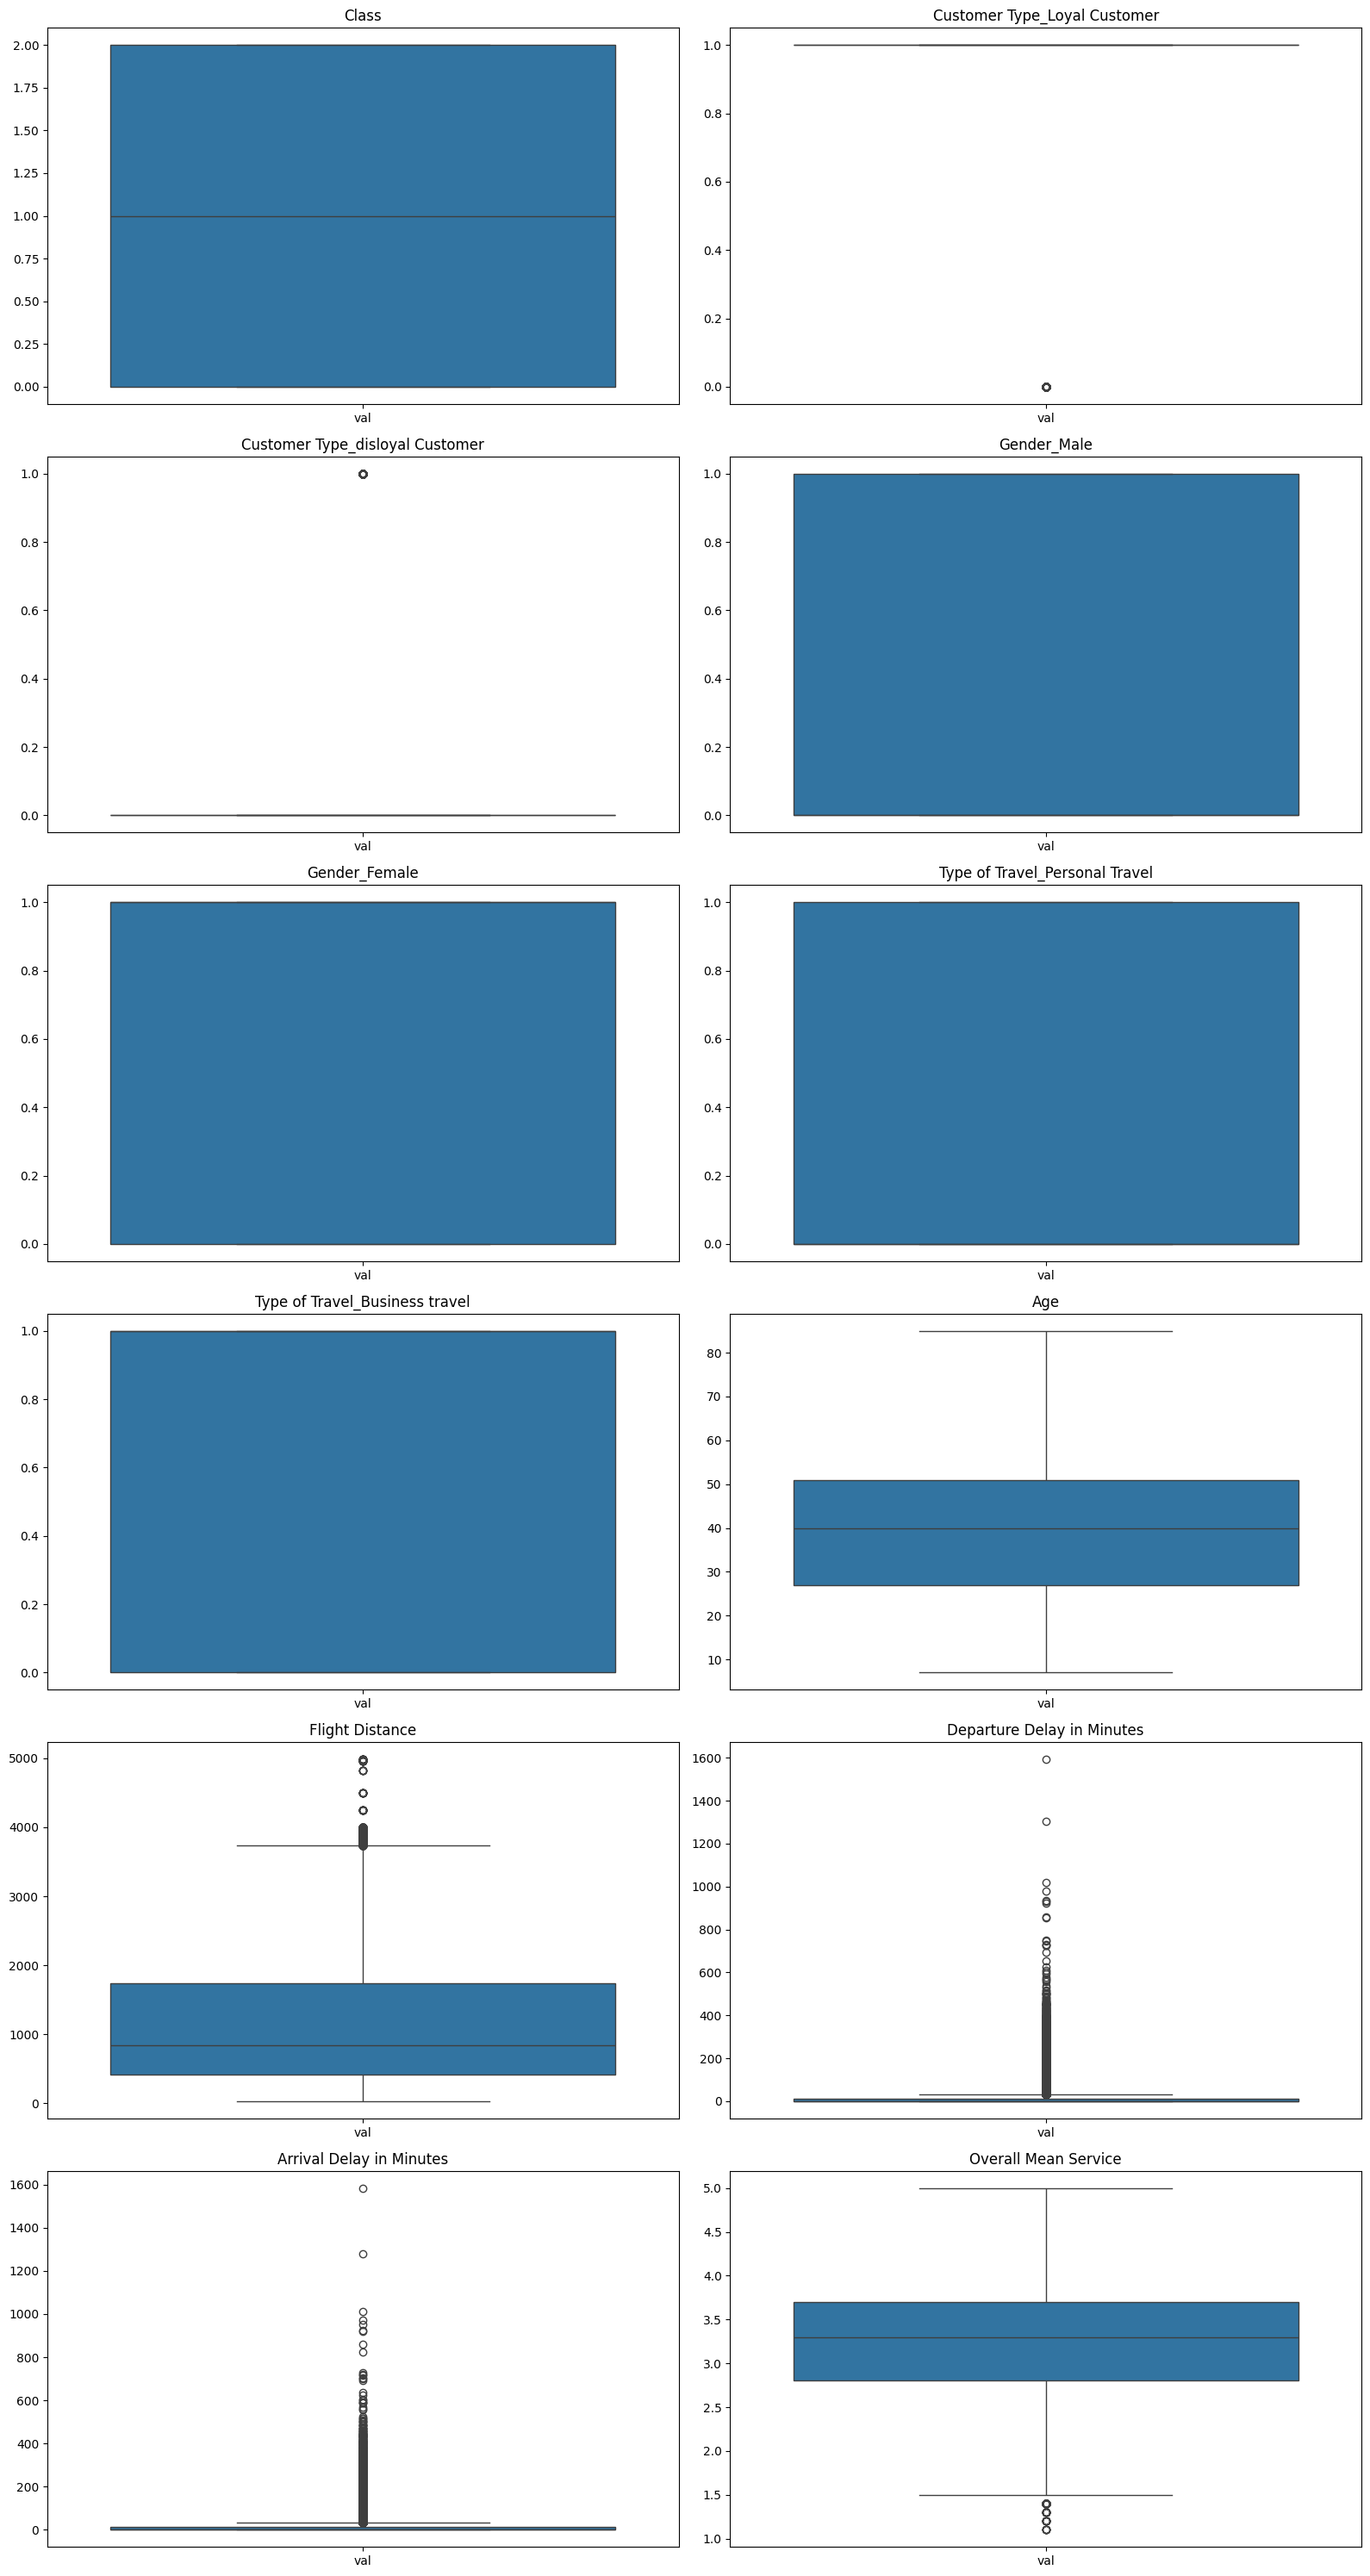

In [34]:
create_boxplot(df_train_f_eng_or_mean)

Osservando i boxplot, in generale molte variabili non presentano dei outliers. le variabili che hanno degli outliers sono:


1. Flight Distance
2. Customer Type_Loyal Customer
3. Customer Type_disloyal Customer
4. Departure Delay in Minutes
5. Arrival Delay in Minutes
6. Overall Mean Service

Per le variabili:
1. Customer Type_Loyal Customer
2. Customer Type_disloyal Customer


Sono variabili categoriche e non richiedono una gestione degli outliers perchè ogni categoria rappresenta un gruppo distinto

Per le variabili:

1. Flight Distance
2. Overall Mean Service

E' stato deciso di non gestire gli outliers perchè analizzando i valori di *Flight Distance* descrivono distanze di volo molto lunghe che esistono per una compagnia aerea. Il valore massimo è di 5000 km, distanza che può percorrere un aereo. Per la variabile *Overall Mean Service* non è necessario rimuovere gli outliers perché è giusto mantenere i casi speciali in cui gli utenti non sono soddisfatti dei servizi della compagnia aerea.

Si considerano solo *Departure Delay in Minutes* *Arrival Delay in Minutes*. Per riconoscere possibili outliers nelle variabili si utilizzerà un **rilevamento automatico di outliers** chiamato *Isolation Forest*. L'Isolation Forest è un metodo di sklearn che aiuta a rintracciare gli outliers attribuendo un punteggio. Questo algoritmo costruisce una foresta di alberi binari dove in ogni albero sceglie casualmente una variabile e la soglia di suddivisione che è compresa tra il massimo e il minimo della variabile. Se il percorso dell'albero è corto, poiché si suppone che gli outliers siano facilmente separabili dai dati normali, l'algoritmo riconosce che è un possibile outlier.

Dopo averli rintracciati, gli outliers verranno eliminati.

In [35]:
def isolation_forest(df_to_iso):
  display(df_to_iso.shape)
  df_outliers = df_to_iso.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes']]
  #n_estimators è un parametro che specifica il numero di alberi da costruire nel modello
  iso = IsolationForest(random_state=42, n_estimators  = 2_000, n_jobs=-1)
  predict_iso = iso.fit_predict(df_outliers)
  outliers = predict_iso != -1
  df_to_iso_copy = df_to_iso.copy()
  df_to_iso_copy['satisfaction'] = df_train_clean['satisfaction']

  df_clean_out = df_to_iso_copy[outliers]


  df_clean_out = df_clean_out.reset_index(drop=True)
  display(df_clean_out.shape)
  return df_clean_out

In questo caso non è stato dato un limite di outliers rintracciati con il parametro contamination.

In [36]:
df_train_clean_out = isolation_forest(df_train_f_eng_or_mean)

(103594, 12)

(83394, 13)

Si osserva nuovamente il boxplot:

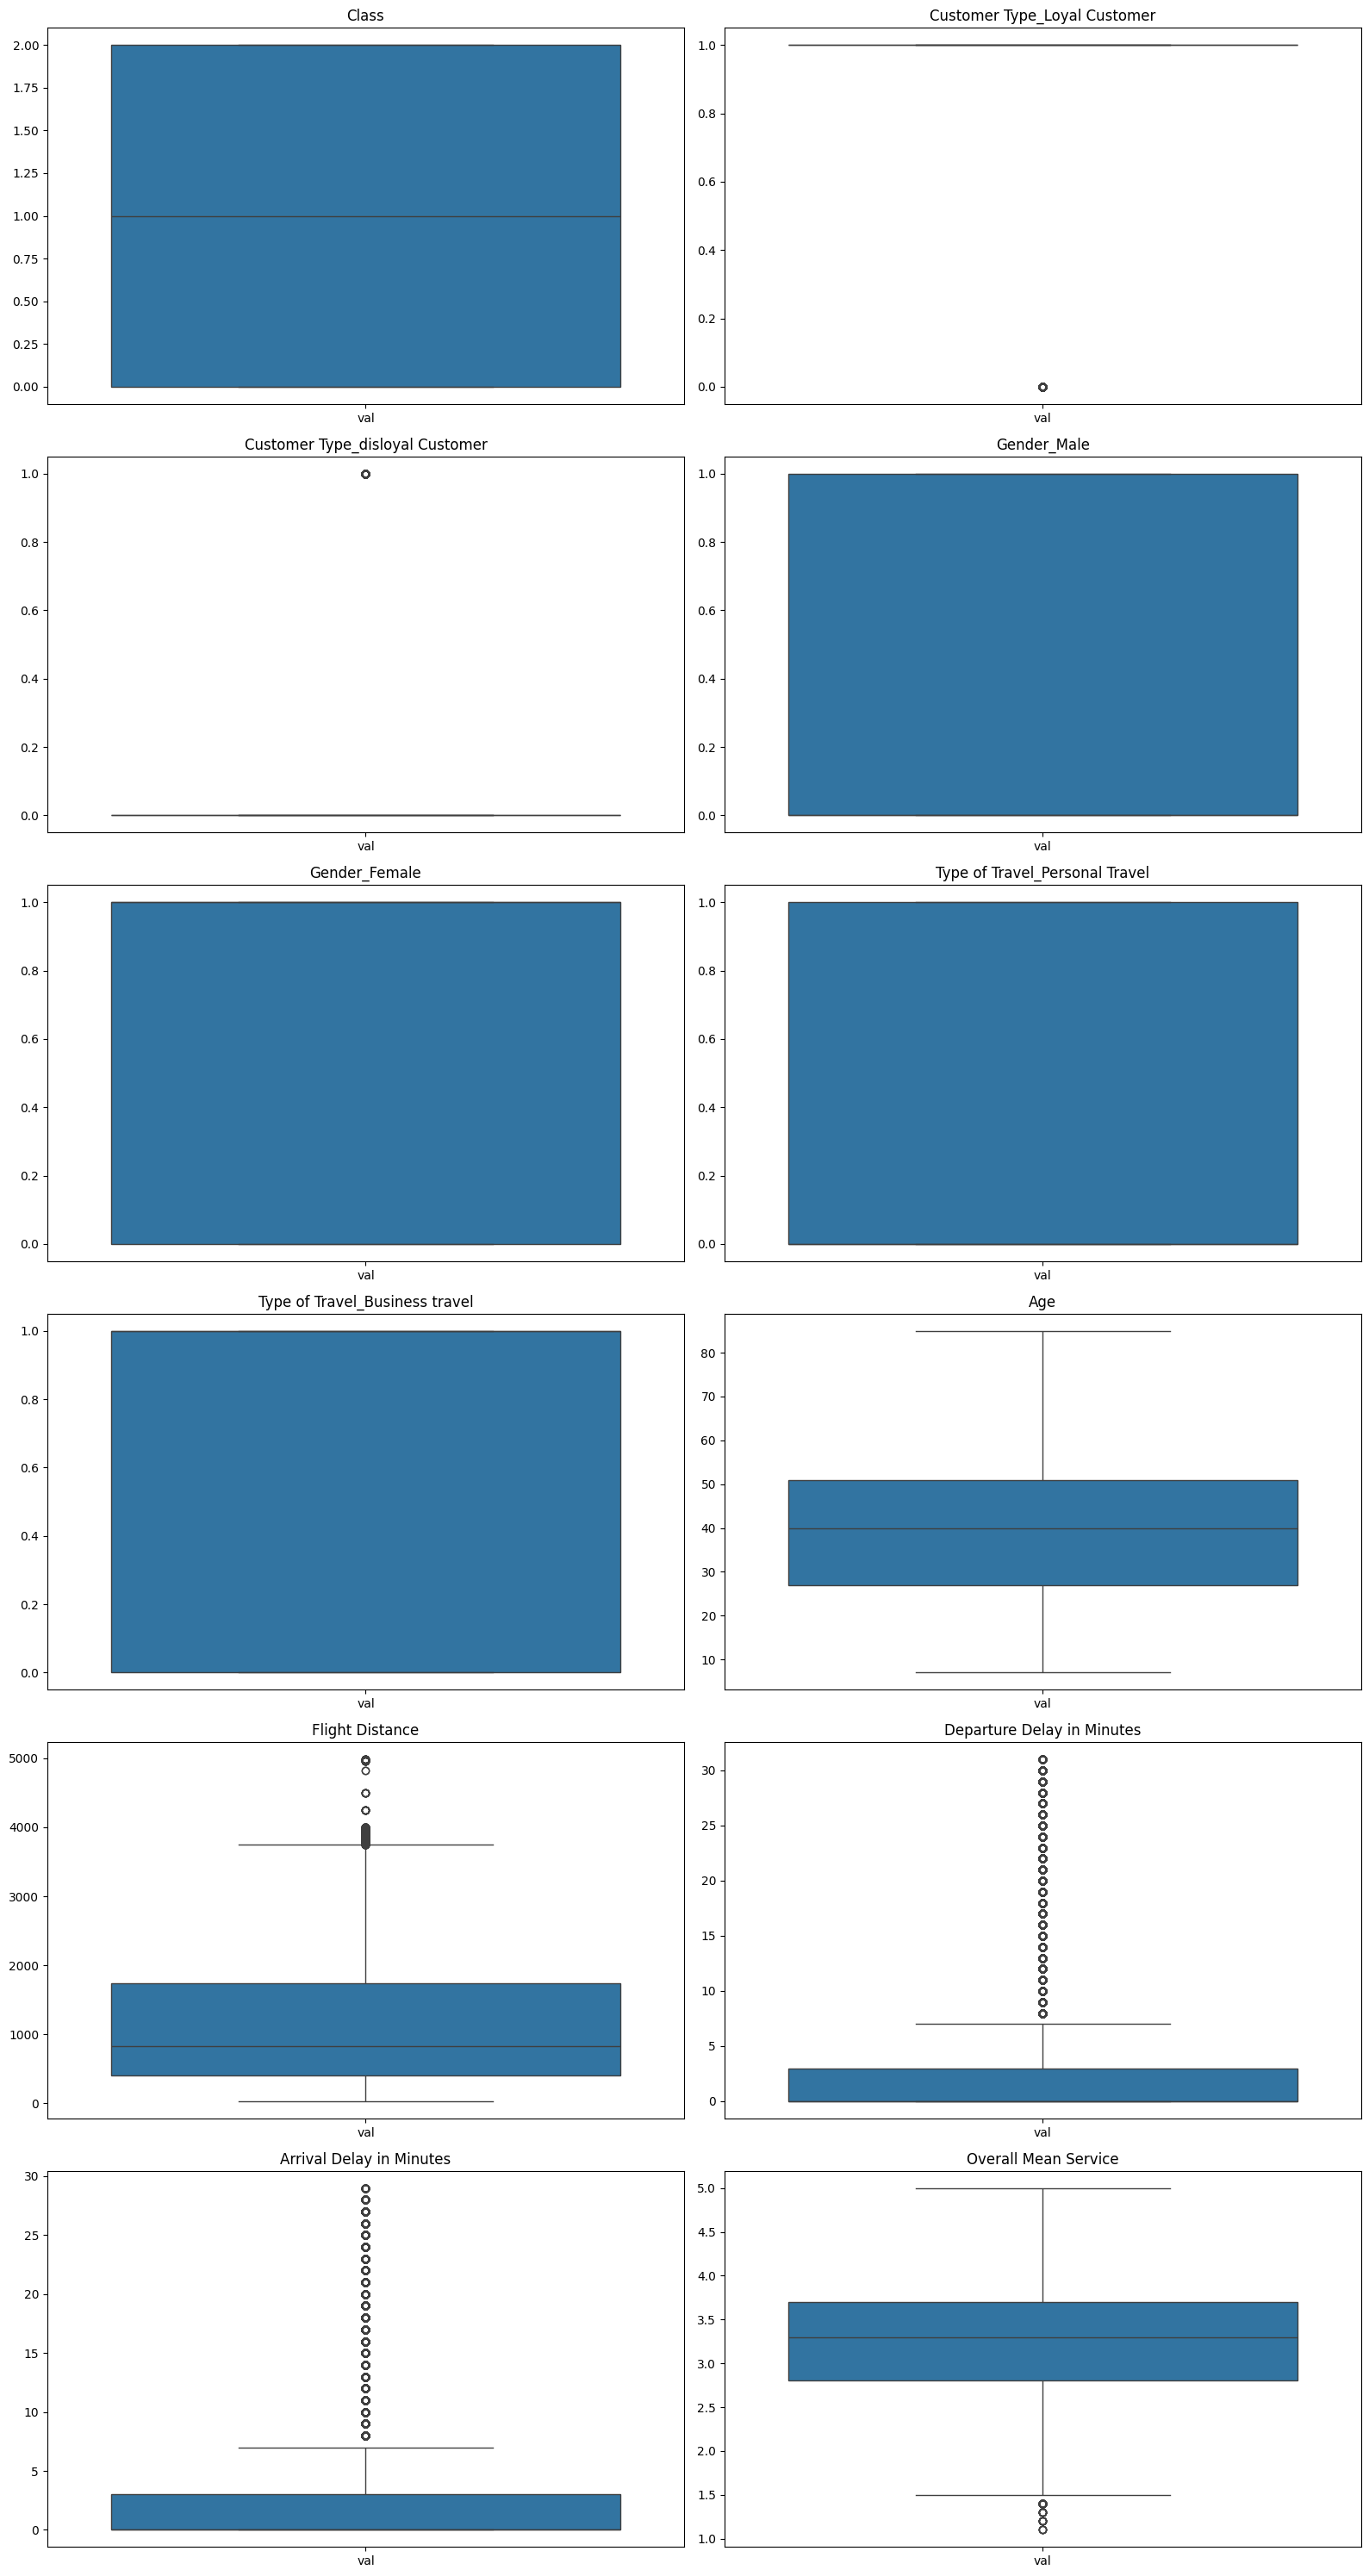

In [37]:
create_boxplot(df_train_clean_out)

sono stati eliminati più di 20k righe e osservando i boxplot delle 2 variabili considerate sono molto calati gli outliers. Non verranno fatte ulteriori esecuzioni perchè si porterebbe ad una perdita di dati importanti che ne danneggerebbe la precisioni dei modelli che verranno utilizzati nelle fasi successive

### STANDARDIZZAZIONE DATASET

Come analizzato nella fase di esplorazione, le variabili hanno intervalli di valori molto diversi tra loro. Un modo per risolvere questo problema e avere tutti i valori sulla stessa scala è la **Standardizzazione del dataset**, cioè trasformare i valori di ogni variabile per ottenere una media di 0 e una deviazione standard pari a 1. Questo step è stato effettuato successivamente al rilevamento e all'eliminazione degli outlier, poiché la standardizzazione è molto sensibile agli outlier che possono influenzare la media e la deviazione standard.
Si utilizzerà la classe sklearn *Standard Scaler*.

In [38]:
scaler = StandardScaler()
df_train_clean_out_no_trg = df_train_clean_out.drop('satisfaction', axis=1)

#viene calcolata le media e la deviazione standard
scaler.fit(df_train_clean_out_no_trg.to_numpy())

#viene applicato la standardizzazione
train_clean_out_scaler = scaler.transform(df_train_clean_out_no_trg.to_numpy())
test_f_eng_or_mean_scaler = scaler.transform(df_test_f_eng_or_mean.to_numpy())

#viene convertito in un dataframe
df_train_scaled = pd.DataFrame(train_clean_out_scaler, columns=name_features)
df_test_scaled = pd.DataFrame(test_f_eng_or_mean_scaler, columns=name_features)

display(df_train_scaled, df_test_scaled)


,Class,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Male,Gender_Female,Type of Travel_Personal Travel,Type of Travel_Business travel,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,-0.036971,0.470976,-0.470976,1.015956,-1.015956,1.489122,-1.489122,-1.749537,-0.725031,3.626607,2.596931,0.976865
1,1.001134,-2.123250,2.123250,1.015956,-1.015956,-0.671537,0.671537,-0.955489,-0.949798,-0.324856,0.528280,-1.445368
2,1.001134,0.470976,-0.470976,-0.984295,0.984295,-0.671537,0.671537,-0.889318,-0.043739,-0.489501,-0.506046,0.674086
3,1.001134,0.470976,-0.470976,-0.984295,0.984295,-0.671537,0.671537,-0.955489,-0.623137,1.321587,1.045443,-0.385641
4,1.001134,0.470976,-0.470976,1.015956,-1.015956,-0.671537,0.671537,1.426656,-0.970776,-0.489501,-0.506046,0.371307
...,...,...,...,...,...,...,...,...,...,...,...,...
83389,-1.075076,-2.123250,2.123250,-0.984295,0.984295,-0.671537,0.671537,-1.087830,-0.992753,0.004432,-0.506046,-1.596757
83390,1.001134,0.470976,-0.470976,1.015956,-1.015956,-0.671537,0.671537,0.632608,1.160010,-0.489501,-0.506046,1.733813
83391,1.001134,-2.123250,2.123250,1.015956,-1.015956,-0.671537,0.671537,-0.624635,0.808375,0.663009,1.907381,-0.234251
83392,-1.075076,-2.123250,2.123250,-0.984295,0.984295,-0.671537,0.671537,-1.154001,-0.185592,-0.489501,-0.506046,-1.445368


,Class,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Male,Gender_Female,Type of Travel_Personal Travel,Type of Travel_Business travel,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,-1.075076,0.470976,-0.470976,-0.984295,0.984295,-0.671537,0.671537,0.831120,-1.024720,7.742714,7.079008,1.279644
1,1.001134,0.470976,-0.470976,-0.984295,0.984295,-0.671537,0.671537,-0.227611,1.675474,-0.489501,-0.506046,0.219917
2,-1.075076,-2.123250,2.123250,1.015956,-1.015956,-0.671537,0.671537,-1.286342,-0.992753,-0.489501,-0.506046,-1.748147
3,1.001134,0.470976,-0.470976,1.015956,-1.015956,-0.671537,0.671537,0.301755,2.188941,-0.489501,0.528280,-2.202315
4,-1.075076,0.470976,-0.470976,-0.984295,0.984295,-0.671537,0.671537,0.632608,-0.003781,-0.489501,2.941706,-0.991199
...,...,...,...,...,...,...,...,...,...,...,...,...
25888,1.001134,-2.123250,2.123250,1.015956,-1.015956,-0.671537,0.671537,-0.359952,-0.659100,-0.489501,-0.506046,0.219917
25889,1.001134,0.470976,-0.470976,1.015956,-1.015956,-0.671537,0.671537,-1.087830,-0.539224,-0.489501,-0.506046,1.582423
25890,-1.075076,0.470976,-0.470976,-0.984295,0.984295,1.489122,-1.489122,-1.484854,-0.357413,-0.489501,-0.506046,-0.385641
25891,1.001134,0.470976,-0.470976,1.015956,-1.015956,-0.671537,0.671537,-1.683366,-0.058724,-0.489501,-0.506046,0.522696


In [39]:
df_train_scaled.describe()

,Class,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Male,Gender_Female,Type of Travel_Personal Travel,Type of Travel_Business travel,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
count,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04,8.339400e+04
mean,3.834140e-19,7.519174e-18,-7.519174e-18,-6.313550e-17,6.313550e-17,-3.024710e-18,3.024710e-18,-7.617157e-17,2.965068e-17,-1.550696e-17,-6.219826e-17,1.495314e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.075076e+00,-2.123250e+00,-4.709761e-01,-9.842948e-01,-1.015956e+00,-6.715365e-01,-1.489122e+00,-2.146561e+00,-1.153586e+00,-4.895006e-01,-5.060456e-01,-3.262042e+00
25%,-1.075076e+00,4.709761e-01,-4.709761e-01,-9.842948e-01,-1.015956e+00,-6.715365e-01,-1.489122e+00,-8.231472e-01,-7.789751e-01,-4.895006e-01,-5.060456e-01,-6.884199e-01
50%,-3.697114e-02,4.709761e-01,-4.709761e-01,-9.842948e-01,9.842948e-01,-6.715365e-01,6.715365e-01,3.707174e-02,-3.514194e-01,-4.895006e-01,-5.060456e-01,6.852775e-02
75%,1.001134e+00,4.709761e-01,-4.709761e-01,1.015956e+00,9.842948e-01,1.489122e+00,6.715365e-01,7.649494e-01,5.576359e-01,4.432290e-03,1.111711e-02,6.740859e-01
max,1.001134e+00,4.709761e-01,2.123250e+00,1.015956e+00,9.842948e-01,1.489122e+00,6.715365e-01,3.014753e+00,3.793273e+00,4.614472e+00,4.493194e+00,2.642150e+00


  si può notare come la deviazione standard di ogni variabile è pari a 1, invece per la media non sono esattamente 0 ma sono molto vicini allo zero, ad esempio la variabile *Class* dove la sua media è pari a 3.834140 × 10^-19, quindi la standardizzazione è avvenuta con successo.

### FEATURE SELECTION: ANALISI DELLE CORRELAZIONI E MULTICOLLINEARITA'

In questa fase verrà analizzata la correlazione tra variabili, cioè quanto le variabili sono dipendenti tra loro. Queste conoscenze sono indispensabili per
vari motivi:
1. Preparare al meglio i dati per i modelli di apprendimento perchè se due o più variabili sono strettamente correlate, il che si chiama multicollinearità, le prestazioni del modello possono peggiorare
2. Comprendere la relazione che c'è tra le variabili
3. Comprendere quali variabili sono rilevanti o meno rispetto al target

In questa fase, questo processo verrà applicato sia training set che nel test set.

Verrà calcolata la correlazione di Pearson con il metodo pandas (corr()) e verranno mostrate le correlazioni con un correlation matrix

In [40]:
def draw_graph_corr(correlation):
    plt.figure(figsize=(30, 10))

    cmap=sns.color_palette("coolwarm", as_cmap=True)
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    sns.heatmap(correlation, mask=mask, vmax=1, center=0, cmap=cmap, annot=True, fmt='.2f')
    plt.show()

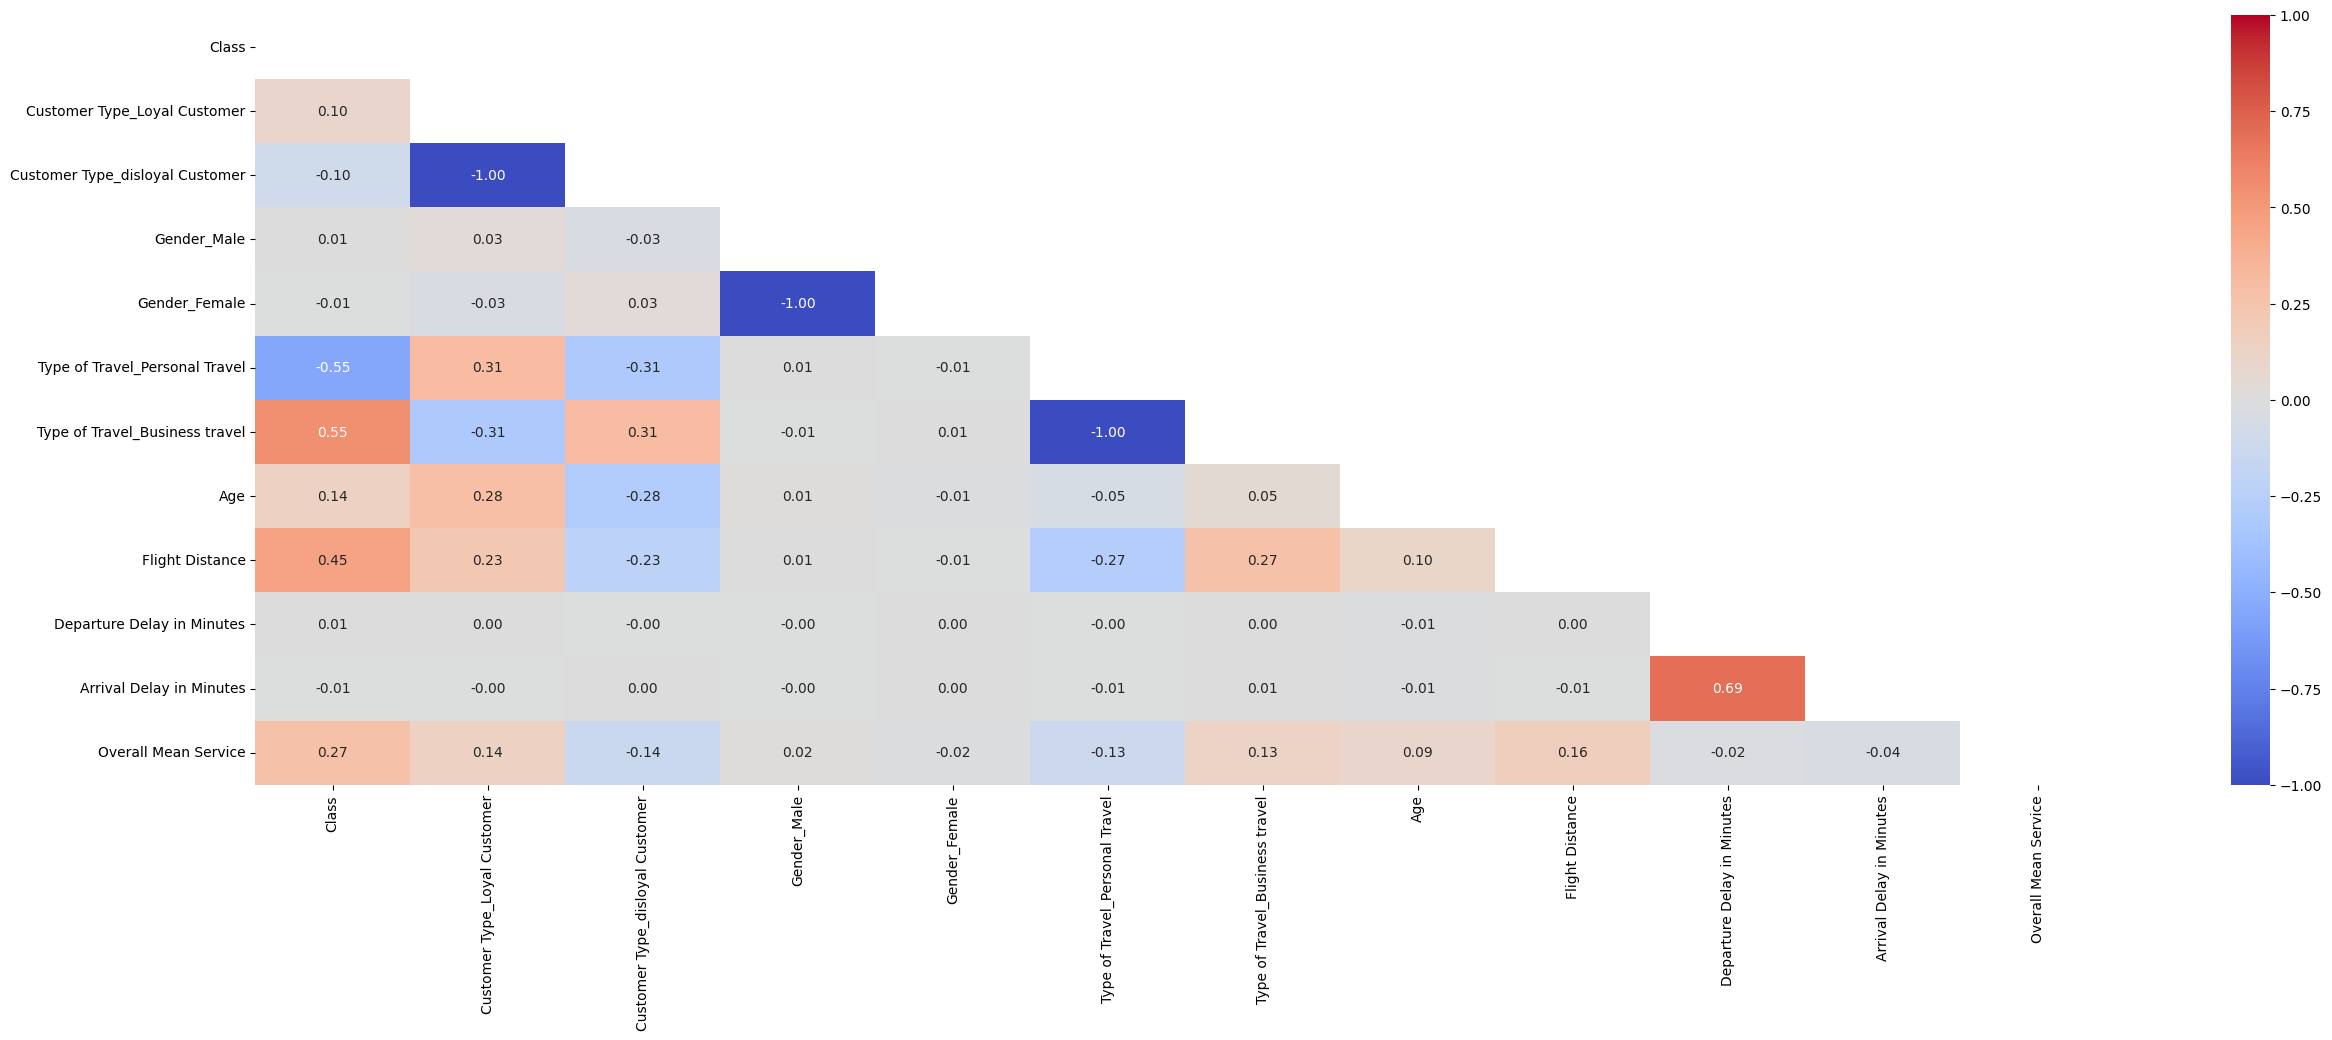

In [41]:
df_train_scaled_corr = df_train_scaled.corr()


draw_graph_corr(df_train_scaled_corr)

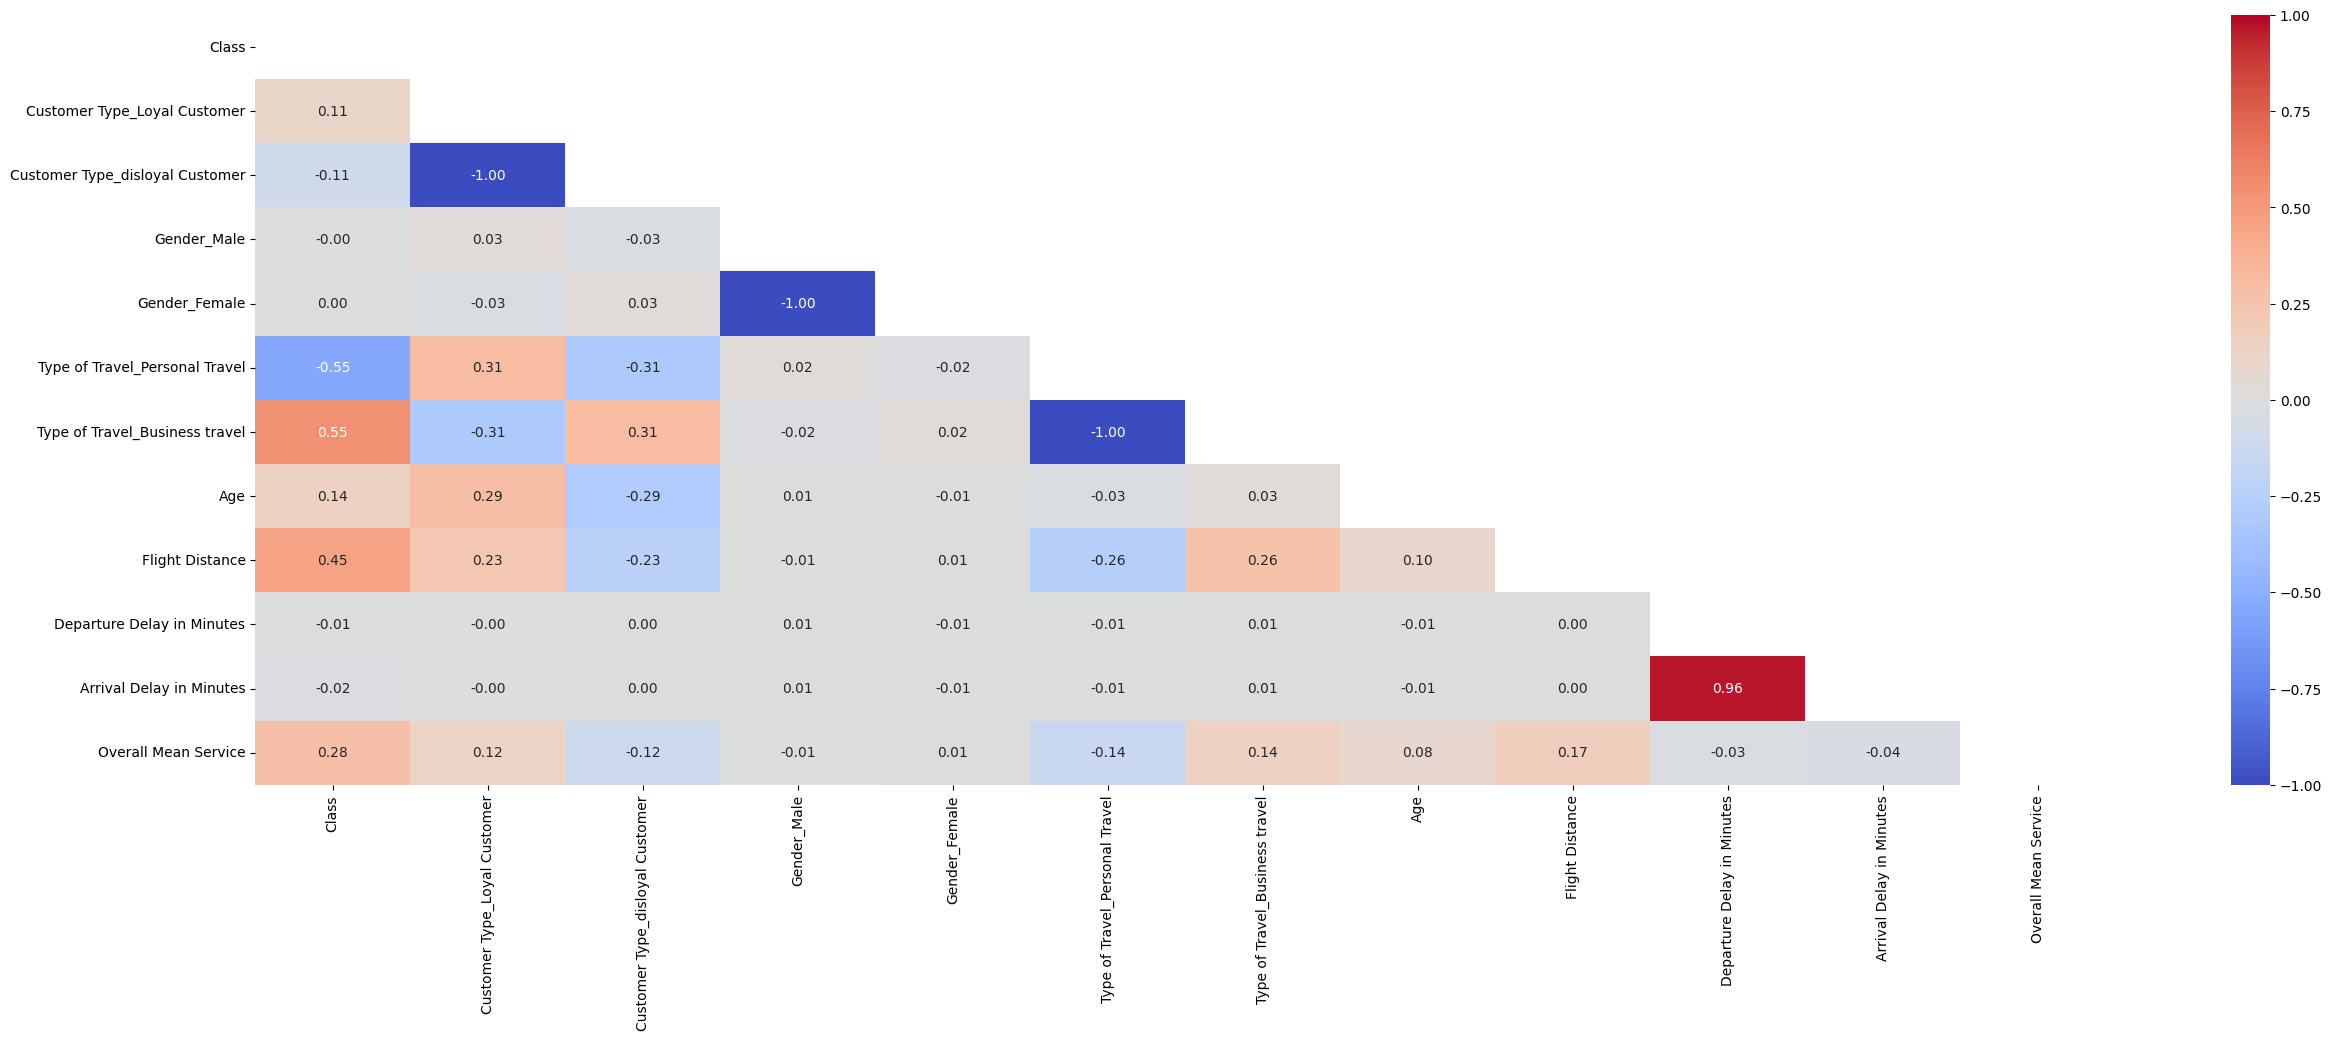

In [42]:
df_test_scaled_corr = df_test_scaled.corr()

draw_graph_corr(df_test_scaled_corr)

I due grafici mostrano le correlazioni delle variabili nel training set e nel test. I valori di correlazione pari a 1 e -1 presentano una multicollinearità. Le correlazioni positive (all'aumentare del valore di una variabile, aumenta anche il valore dell'altra variabile) sono rappresentate dalle sfumature di rosso, mentre le correlazioni negative (all'aumentare del valore di una variabile, diminuisce il valore dell'altra variabile) sono rappresentate dalle sfumature di blu. Se la sfumatura del colore è molto intensa, la forza della correlazione è maggiore; se il colore è debole, la forza della correlazione è minore.


Il tipo di forza delle correlazioni:
1. da 0.9 a 1 o da -0.9 a -1 --> Multicollinearità
2. da 0.5 a 0.9 o da -0.5 a -0.9 --> Forte
3. da 0.1 a 0.5 o da -0.1 a -0.5 --> Debole
4. da 0.0 a 0.1 o da 0.0 a -0.1 --> Non correlata


I due grafici non presentano enormi differenze:
1. C'è una correlazione positiva forte tra le variabili *Class*, *Type of Travel_Business travel*
2. Una correlazione negativa forte tra *Class* e *Type of Travel_Personal Travel*
3. Una correlazione positiva debole tra:
      1. Age e Class
      2. Flight Distance e Class
      3. Overall Mean Service e Class
      4. Type of Travel_Personal Travel e Customer Type_Loyal Customer
      5. Age e Customer Type_Loyal Customer
      6. Flight Distance e Customer Type_Loyal Customer
      7. Overall Mean Service e Customer Type_Loyal Customer
      8. Type of Travel_Business travel e Customer Type_disloyal Customer
      9. Flight Distance e Type of Travel_Business travel
      10. Overall Mean Service e Type of Travel_Business travel
      11. Flight Distance e Age
      12. Overall Mean Service e Flight Distance
4. Una correlazione negativa debole tra:
      1. Type of Travel_Business travel e Customer Type_Loyal Customer
      2. Customer Type_disloyal Customer e Type of Travel_Personal Travel, Age, FLight Distance e Overall Mean Service
      3. Type of Travel_Personal Travel e Flight Distance e Overall Mean Service
5. Hanno una multicollinearità negative le variabili:
      1. Gender_Male e Gender_Female
      2. Type of Travel_Personal Travel e Type of Travel_Business travel
      3. Customer Type_disloyal Customer e Customer Type_Loyal Customer
   
   
   poichè sono variabili categoriche binarie e mutualmente esclusive, trasformate nel passo precedente, non saranno analizzate.


L'unica correlazione diversa tra i due dataset è quella tra le variabili Arrival Delay in Minutes e Departure Delay in Minutes. Nel training set, la correlazione è pari a 0.69, una correlazione positiva forte, mentre nel test set la correlazione è pari a 0.96, indicando una multicollinearità che comporterebbe un alta dipendenza tra le due variabili. Probabilmente, la discrepanza è dovuta all'eliminazione degli outlier nel training set, un'azione che non è stata effettuata nel test set.

Per confermare l'analisi grafica appena effettuata, si effettuerà il test del Chi-square di indipendenza. Il test del chi-square di indipendenza verifica che le variabili siano correlate. Per poter ottenere un test valido bisogna soddisfare 3 condizioni:
1. Un campione casuale (condizione soddisfatta)
2. Due variabili categoriche
3. Per ogni combinazione dei livelli delle due variabili, sono necessari almeno cinque valori attesi. Per poter calcolare i valori attesi ci sarà bisogno della tabella di contigenza.


Una delle condizioni necessarie per poter effettuare il test è che tutte le variabili devono essere categoriche o ordinali e nel nostro caso solo la metà delle variabili sono categoriche o ordinali. Per il resto delle variabili, verrà effettuata una conversione in intervalli (o bin) e ad ogni intervallo verrà assegnato una categoria (un numero). Si utilizzerà la classe sklearn *KBinsDiscretizer*. I parametri principali che verranno utilizzati sono:
1. I bin che di default sono 5 e non verranno modificati.
2. La strategia in cui verranno divisi i dati delle variabili. Si analizzerà la distribuzione di ogni variabile; se non è uniforme, si potrà decidere tra i quantili e KMeans.

array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'Customer Type_Loyal Customer'}>,
        <Axes: title={'center': 'Customer Type_disloyal Customer'}>],
       [<Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Type of Travel_Personal Travel'}>],
       [<Axes: title={'center': 'Type of Travel_Business travel'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>,
        <Axes: title={'center': 'Overall Mean Service'}>]], dtype=object)

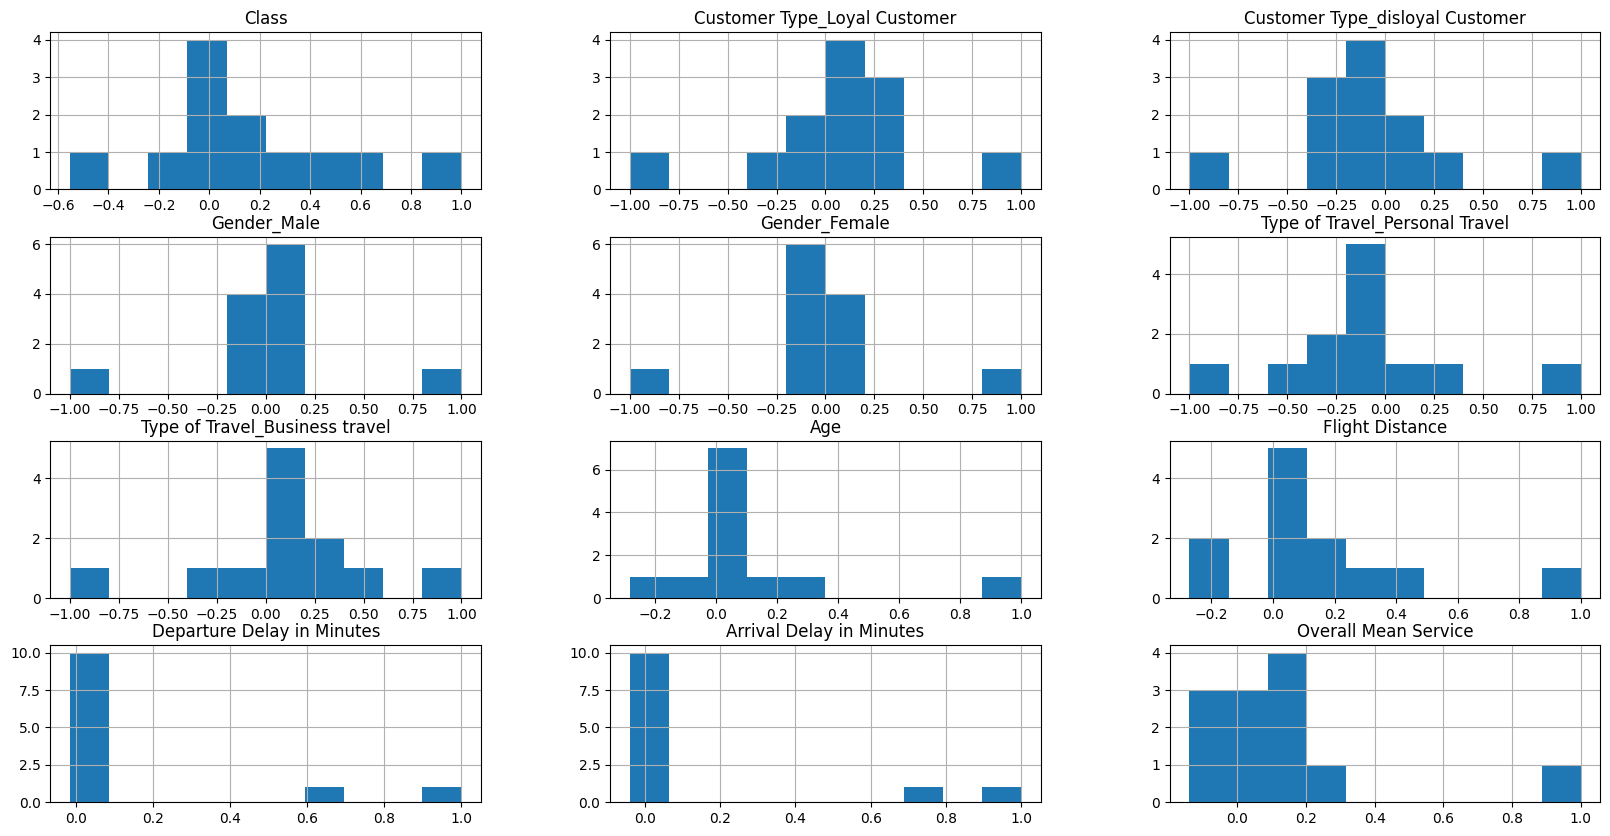

In [43]:
df_train_scaled_corr.hist(figsize=(20,10))

Dall'analisi degli istogrammi, le variabili non hanno una distribuzione uniforme, cioè che i dati non sono distribuiti in maniera uniforme su un intervallo di valori, quindi come strategia si utilizzerà i *quantili* che è di default: questa tecnica divide il set di dati in bin di uguale dimensione.Ogni bin contiene un numero uguale di dati.
3. La codifica dei valori verrà impostata su *ordinal* per evitare l'aumento del numero di variabili nel dataset. Utilizzando l'encoding di default, cioè one-hot, restituirebbe una matrice sparsa, il che aumenterebbe il numero di variabili nel dataset. Tuttavia, con l'encoding ordinal, ogni valore sarà mappata al suo rispettivo bin attraverso un'etichetta intera, mantenendo quindi il numero di variabili invariato.

In [44]:
df_train_scaled_continuos = df_train_scaled.loc[:,"Age":"Overall Mean Service"]
df_test_scaled_continuos = df_test_scaled.loc[:,"Age":"Overall Mean Service"]

kbd = KBinsDiscretizer(encode='ordinal', random_state=42)
kbd.fit(df_train_scaled_continuos)

kbd_train = kbd.transform(df_train_scaled_continuos)
kbd_test = kbd.transform(df_test_scaled_continuos)

#viene convertito in un dataframe
df_train_bin_data_feat_continuos = pd.DataFrame(kbd_train, columns=['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Overall Mean Service'])
df_test_bin_data_feat_continuos = pd.DataFrame(kbd_test, columns=['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Overall Mean Service'])


display(df_train_clean_out_no_trg)
#visualizzazione training set con binning dei dati
display(df_train_bin_data_feat_continuos)
#visualizzazione del test set con binning dei dati
display(df_test_bin_data_feat_continuos)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


,Class,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Male,Gender_Female,Type of Travel_Personal Travel,Type of Travel_Business travel,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,13,460,25,18,3.9
1,2.0,0.0,1.0,1.0,0.0,0.0,1.0,25,235,1,6,2.3
2,2.0,1.0,0.0,0.0,1.0,0.0,1.0,26,1142,0,0,3.7
3,2.0,1.0,0.0,0.0,1.0,0.0,1.0,25,562,11,9,3.0
4,2.0,1.0,0.0,1.0,0.0,0.0,1.0,61,214,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
83389,0.0,0.0,1.0,0.0,1.0,0.0,1.0,23,192,3,0,2.2
83390,2.0,1.0,0.0,1.0,0.0,0.0,1.0,49,2347,0,0,4.4
83391,2.0,0.0,1.0,1.0,0.0,0.0,1.0,30,1995,7,14,3.1
83392,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22,1000,0,0,2.3


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,0.0,1.0,1.0,1.0,4.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,0.0,0.0,3.0
3,1.0,1.0,1.0,1.0,1.0
4,4.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...
83389,0.0,0.0,0.0,0.0,0.0
83390,3.0,4.0,0.0,0.0,4.0
83391,1.0,3.0,1.0,1.0,2.0
83392,0.0,2.0,0.0,0.0,0.0


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Mean Service
0,3.0,0.0,1.0,1.0,4.0
1,2.0,4.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,0.0,1.0,0.0
4,3.0,3.0,0.0,1.0,1.0
...,...,...,...,...,...
25888,1.0,1.0,0.0,0.0,3.0
25889,0.0,2.0,0.0,0.0,4.0
25890,0.0,2.0,0.0,0.0,1.0
25891,0.0,3.0,0.0,0.0,3.0


Dopo aver trasformato le variabili numeriche in categoriche,la seconda condizione del test del chi-square verrà sempre soddisfatta, verrà creata la tabella di contigenza, per il calcolo dei valori attesi. Per la verifica della terza condizione, verrà eseguita nella cella successiva con la libreria scipy con il metodo *chi_square_test*

Successivamente è necessario determinare l'ipotesi nulla (H0) e alternativa (HA).

1. H0 : Le due variabili categoriche non hanno alcuna relazione, quindi indipendenti.
2. HA : Esiste una relazione tra due variabili categoriche.


È inoltre necessario determinare il valore di α. Di solito è pari a 0,05 (5%). Si utilizzerà il p_value, è un valore che misura la probabilità che un evento si verifichi sotto l'ipotesi nulla. Se p <= alpha, la probabilità di ottenere i dati osservati sotto l'ipotesi nulla è abbastanza bassa da rifiutare l'ipotesi nulla.
Se p > alpha, la probabilità di ottenere i dati osservati sotto l'ipotesi nulla non è sufficientemente bassa per rifiutare l'ipotesi nulla.

In [45]:
def chi_square_test(column_first_rel,column_second_rel):
  contingency_table=pd.crosstab(column_first_rel,column_second_rel)

  display(contingency_table)

  stat, p_value, dof, expected_value = chi2_contingency(contingency_table)

  alpha = 0.05

  print("Chi-squared statistic:", stat)
  print("p-value:", p_value)
  print("Gradi di libertà:", dof)
  print("Tabella delle frequenze attese:", expected_value)
  if p_value <= alpha:
      print('Dipendente (H0 rigettata)')
  else:
      print('Independente (si rifiuta di rigettare H0)')

Viene analizzato la correlazione tra le variabili *Departure Delay in Minutes* e *Arrival Delay in Minutes* nel training set. Viene implementato la tabella di contigenza

In [46]:
chi_square_test(df_train_bin_data_feat_continuos["Departure Delay in Minutes"],df_train_bin_data_feat_continuos["Arrival Delay in Minutes"])

Arrival Delay in Minutes,0.0,1.0
Departure Delay in Minutes,,
0.0,58462,7498
1.0,6901,10533


Chi-squared statistic: 19572.919254722387
p-value: 0.0
Gradi di libertà: 1
Tabella delle frequenze attese: [[51698.48526273 14261.51473727]
 [13664.51473727  3769.48526273]]
Dipendente (H0 rigettata)


In [47]:
chi_square_test(df_test_bin_data_feat_continuos["Departure Delay in Minutes"],df_test_bin_data_feat_continuos["Arrival Delay in Minutes"])

Arrival Delay in Minutes,0.0,1.0
Departure Delay in Minutes,,
0.0,14650,2295
1.0,1959,6989


Chi-squared statistic: 10610.21327972657
p-value: 0.0
Gradi di libertà: 1
Tabella delle frequenze attese: [[10869.32781061  6075.67218939]
 [ 5739.67218939  3208.32781061]]
Dipendente (H0 rigettata)


Con questo ultimo test ha evidenziato una certa dipendenza tra le due variabili in entrambi i dataset e il test è valido poichè viene confermata la terza condizione cioè che i valori attesi > 5.

Si analizzano le correlazioni osservate nel passo precedente. Per le prossime variabili, verrà considerato solo il training set, poiché dal correlation matrix è stato osservato che le correlazioni sono molto simili.

In [48]:
chi_square_test(df_train_scaled["Class"],df_train_scaled["Type of Travel_Business travel"])


Type of Travel_Business travel,-1.489122,0.671537
Class,,
-1.075076,21336,15924
-0.036971,2865,3039
1.001134,1718,38512


Chi-squared statistic: 26262.349490943503
p-value: 0.0
Gradi di libertà: 2
Tabella delle frequenze attese: [[11580.47269588 25679.52730412]
 [ 1834.97345133  4069.02654867]
 [12503.5538528  27726.4461472 ]]
Dipendente (H0 rigettata)


In [49]:
chi_square_test(df_train_scaled["Class"],df_train_scaled["Type of Travel_Personal Travel"])

Type of Travel_Personal Travel,-0.671537,1.489122
Class,,
-1.075076,15924,21336
-0.036971,3039,2865
1.001134,38512,1718


Chi-squared statistic: 26262.349490943503
p-value: 0.0
Gradi di libertà: 2
Tabella delle frequenze attese: [[25679.52730412 11580.47269588]
 [ 4069.02654867  1834.97345133]
 [27726.4461472  12503.5538528 ]]
Dipendente (H0 rigettata)


In [50]:
chi_square_test(df_train_scaled["Class"],df_train_bin_data_feat_continuos["Age"])

Age,0.0,1.0,2.0,3.0,4.0
Class,,,,,
-1.075076,10619,7283,5750,5963,7645
-0.036971,1260,1411,929,1008,1296
1.001134,3929,8623,9169,10743,7766


Chi-squared statistic: 5371.155257242103
p-value: 0.0
Gradi di libertà: 8
Tabella delle frequenze attese: [[7062.93114613 7737.14439888 7080.80293546 7914.52190805 7464.59961148]
 [1119.15044248 1225.98230088 1121.98230088 1254.08849558 1182.79646018]
 [7625.9184114  8353.87330024 7645.21476365 8545.38959637 8059.60392834]]
Dipendente (H0 rigettata)


In [51]:
chi_square_test(df_train_scaled["Class"],df_train_bin_data_feat_continuos["Flight Distance"])

Flight Distance,0.0,1.0,2.0,3.0,4.0
Class,,,,,
-1.075076,9832,9770,9936,6132,1590
-0.036971,1633,1558,1500,926,287
1.001134,5202,5319,5273,9606,14830


Chi-squared statistic: 17156.45187816175
p-value: 0.0
Gradi di libertà: 8
Tabella delle frequenze attese: [[7446.72782215 7437.79192748 7465.49320095 7445.38743795 7464.59961148]
 [1179.96460177 1178.54867257 1182.9380531  1179.75221239 1182.79646018]
 [8040.30757608 8030.65939996 8060.56874595 8038.86034967 8059.60392834]]
Dipendente (H0 rigettata)


In [52]:
chi_square_test(df_train_scaled["Class"],df_train_bin_data_feat_continuos["Overall Mean Service"])

Overall Mean Service,0.0,1.0,2.0,3.0,4.0
Class,,,,,
-1.075076,7109,10328,6719,9116,3988
-0.036971,1219,1459,1028,1476,722
1.001134,4347,6368,5637,11240,12638


Chi-squared statistic: 6784.825143099604
p-value: 0.0
Gradi di libertà: 8
Tabella delle frequenze attese: [[ 5663.12324628  8111.5583855   5979.90071228  9754.42262033
   7750.99503561]
 [  897.34513274  1285.30973451   947.53982301  1545.62831858
   1228.17699115]
 [ 6114.53162098  8758.13187999  6456.55946471 10531.94906108
   8368.82797324]]
Dipendente (H0 rigettata)


In [53]:
chi_square_test(df_train_scaled["Type of Travel_Personal Travel"],df_train_scaled["Customer Type_Loyal Customer"])

Customer Type_Loyal Customer,-2.123250,0.470976
Type of Travel_Personal Travel,,
-0.671537,15009,42466
1.489122,131,25788


Chi-squared statistic: 7882.297136748771
p-value: 0.0
Gradi di libertà: 1
Tabella delle frequenze attese: [[10434.46171187 47040.53828813]
 [ 4705.53828813 21213.46171187]]
Dipendente (H0 rigettata)


In [54]:
chi_square_test(df_train_scaled["Customer Type_Loyal Customer"],df_train_bin_data_feat_continuos["Age"])

Age,0.0,1.0,2.0,3.0,4.0
Customer Type_Loyal Customer,,,,,
-2.123250,5336,5099,2901,1118,686
0.470976,10472,12218,12947,16596,16021


Chi-squared statistic: 7966.314543422389
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[ 2869.90814687  3143.86382713  2877.1700602   3215.93831691
   3033.1196489 ]
 [12938.09185313 14173.13617287 12970.8299398  14498.06168309
  13673.8803511 ]]
Dipendente (H0 rigettata)


In [55]:
chi_square_test(df_train_scaled["Customer Type_Loyal Customer"],df_train_bin_data_feat_continuos["Overall Mean Service"])

Overall Mean Service,0.0,1.0,2.0,3.0,4.0
Customer Type_Loyal Customer,,,,,
-2.123250,3109,4216,2738,3433,1644
0.470976,9566,13939,10646,18399,15704


Chi-squared statistic: 1674.1004185277518
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[ 2301.11878552  3296.00091134  2429.83619925  3963.55229393
   3149.49180996]
 [10373.88121448 14858.99908866 10954.16380075 17868.44770607
  14198.50819004]]
Dipendente (H0 rigettata)


In [56]:
chi_square_test(df_train_scaled["Type of Travel_Business travel"],df_train_scaled["Customer Type_disloyal Customer"])

Customer Type_disloyal Customer,-0.470976,2.123250
Type of Travel_Business travel,,
-1.489122,25788,131
0.671537,42466,15009


Chi-squared statistic: 7882.29713674877
p-value: 0.0
Gradi di libertà: 1
Tabella delle frequenze attese: [[21213.46171187  4705.53828813]
 [47040.53828813 10434.46171187]]
Dipendente (H0 rigettata)


In [57]:
chi_square_test(df_train_scaled["Type of Travel_Business travel"],df_train_bin_data_feat_continuos["Flight Distance"])

Flight Distance,0.0,1.0,2.0,3.0,4.0
Type of Travel_Business travel,,,,,
-1.489122,6375,6686,6805,4590,1463
0.671537,10292,9961,9904,12074,15244


Chi-squared statistic: 5750.991135111271
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[ 5180.13253951  5173.91650478  5193.18621244  5179.2001343
   5192.56460896]
 [11486.86746049 11473.08349522 11515.81378756 11484.7998657
  11514.43539104]]
Dipendente (H0 rigettata)


In [58]:
chi_square_test(df_train_scaled["Type of Travel_Business travel"],df_train_bin_data_feat_continuos["Overall Mean Service"])

Overall Mean Service,0.0,1.0,2.0,3.0,4.0
Type of Travel_Business travel,,,,,
-1.489122,4050,7156,4938,6816,2959
0.671537,8625,10999,8446,15016,14389


Chi-squared statistic: 2397.6011978554507
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[ 3939.41200806  5642.60552318  4159.77043912  6785.42350769
   5391.78852196]
 [ 8735.58799194 12512.39447682  9224.22956088 15046.57649231
  11956.21147804]]
Dipendente (H0 rigettata)


In [59]:
chi_square_test(df_train_bin_data_feat_continuos["Flight Distance"],df_train_bin_data_feat_continuos["Age"])

Age,0.0,1.0,2.0,3.0,4.0
Flight Distance,,,,,
0.0,3341,3133,3525,3040,3628
1.0,3723,3471,3068,3105,3280
2.0,4081,3879,2682,3060,3007
3.0,3142,3636,2967,3736,3183
4.0,1521,3198,3606,4773,3609


Chi-squared statistic: 2244.321836814608
p-value: 0.0
Gradi di libertà: 16
Tabella delle frequenze attese: [[3159.36321558 3460.94969662 3167.3575557  3540.29352232 3339.03600978]
 [3155.57205554 3456.79664005 3163.55680265 3536.04525505 3335.02924671]
 [3167.32465165 3469.67111543 3175.33913711 3549.21488356 3347.45021225]
 [3158.79454157 3460.32673813 3166.78744274 3539.65628223 3338.43499532]
 [3166.94553565 3469.25580977 3174.9590618  3548.79005684 3347.04953594]]
Dipendente (H0 rigettata)


In [60]:
chi_square_test(df_train_bin_data_feat_continuos["Flight Distance"],df_train_bin_data_feat_continuos["Overall Mean Service"])

Overall Mean Service,0.0,1.0,2.0,3.0,4.0
Flight Distance,,,,,
0.0,3026,4103,2910,4075,2553
1.0,2720,4100,2757,4290,2780
2.0,2715,3956,2831,4372,2835
3.0,2281,3341,2586,4521,3935
4.0,1933,2655,2300,4574,5245


Chi-squared statistic: 2314.3811538668756
p-value: 0.0
Gradi di libertà: 16
Tabella delle frequenze attese: [[2533.20652565 3628.43112214 2674.90620428 4363.31083771 3467.14531021]
 [2530.16673861 3624.07709188 2671.69638103 4358.07496942 3462.98481905]
 [2539.59007842 3637.5745857  2681.64683311 4374.30616111 3475.88234166]
 [2532.75055759 3627.7780176  2674.4247308  4362.52545747 3466.52123654]
 [2539.28609972 3637.13918268 2681.32585078 4373.78257429 3475.46629254]]
Dipendente (H0 rigettata)


In [61]:
chi_square_test(df_train_scaled["Type of Travel_Business travel"],df_train_scaled["Customer Type_Loyal Customer"])

Customer Type_Loyal Customer,-2.123250,0.470976
Type of Travel_Business travel,,
-1.489122,131,25788
0.671537,15009,42466


Chi-squared statistic: 7882.297136748771
p-value: 0.0
Gradi di libertà: 1
Tabella delle frequenze attese: [[ 4705.53828813 21213.46171187]
 [10434.46171187 47040.53828813]]
Dipendente (H0 rigettata)


In [62]:
chi_square_test(df_train_scaled["Customer Type_disloyal Customer"],df_train_scaled["Type of Travel_Personal Travel"])

Type of Travel_Personal Travel,-0.671537,1.489122
Customer Type_disloyal Customer,,
-0.470976,42466,25788
2.123250,15009,131


Chi-squared statistic: 7882.29713674877
p-value: 0.0
Gradi di libertà: 1
Tabella delle frequenze attese: [[47040.53828813 21213.46171187]
 [10434.46171187  4705.53828813]]
Dipendente (H0 rigettata)


In [63]:
chi_square_test(df_train_scaled["Customer Type_disloyal Customer"],df_train_bin_data_feat_continuos["Age"])


Age,0.0,1.0,2.0,3.0,4.0
Customer Type_disloyal Customer,,,,,
-0.470976,10472,12218,12947,16596,16021
2.123250,5336,5099,2901,1118,686


Chi-squared statistic: 7966.314543422388
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[12938.09185313 14173.13617287 12970.8299398  14498.06168309
  13673.8803511 ]
 [ 2869.90814687  3143.86382713  2877.1700602   3215.93831691
   3033.1196489 ]]
Dipendente (H0 rigettata)


In [64]:
chi_square_test(df_train_scaled["Customer Type_disloyal Customer"],df_train_bin_data_feat_continuos["Flight Distance"])

Flight Distance,0.0,1.0,2.0,3.0,4.0
Customer Type_disloyal Customer,,,,,
-0.470976,12626,12711,12563,14064,16290
2.123250,4041,3936,4146,2600,417


Chi-squared statistic: 4082.2211952404186
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[13641.14226443 13624.7732211  13675.51725544 13638.68690793
  13673.8803511 ]
 [ 3025.85773557  3022.2267789   3033.48274456  3025.31309207
   3033.1196489 ]]
Dipendente (H0 rigettata)


In [65]:
chi_square_test(df_train_scaled["Customer Type_disloyal Customer"],df_train_bin_data_feat_continuos["Overall Mean Service"])


Overall Mean Service,0.0,1.0,2.0,3.0,4.0
Customer Type_disloyal Customer,,,,,
-0.470976,9566,13939,10646,18399,15704
2.123250,3109,4216,2738,3433,1644


Chi-squared statistic: 1674.1004185277516
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[10373.88121448 14858.99908866 10954.16380075 17868.44770607
  14198.50819004]
 [ 2301.11878552  3296.00091134  2429.83619925  3963.55229393
   3149.49180996]]
Dipendente (H0 rigettata)


In [66]:
chi_square_test(df_train_scaled["Type of Travel_Personal Travel"],df_train_bin_data_feat_continuos["Flight Distance"])

Flight Distance,0.0,1.0,2.0,3.0,4.0
Type of Travel_Personal Travel,,,,,
-0.671537,10292,9961,9904,12074,15244
1.489122,6375,6686,6805,4590,1463


Chi-squared statistic: 5750.99113511127
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[11486.86746049 11473.08349522 11515.81378756 11484.7998657
  11514.43539104]
 [ 5180.13253951  5173.91650478  5193.18621244  5179.2001343
   5192.56460896]]
Dipendente (H0 rigettata)


In [67]:
chi_square_test(df_train_scaled["Type of Travel_Personal Travel"],df_train_bin_data_feat_continuos["Overall Mean Service"])

Overall Mean Service,0.0,1.0,2.0,3.0,4.0
Type of Travel_Personal Travel,,,,,
-0.671537,8625,10999,8446,15016,14389
1.489122,4050,7156,4938,6816,2959


Chi-squared statistic: 2397.6011978554507
p-value: 0.0
Gradi di libertà: 4
Tabella delle frequenze attese: [[ 8735.58799194 12512.39447682  9224.22956088 15046.57649231
  11956.21147804]
 [ 3939.41200806  5642.60552318  4159.77043912  6785.42350769
   5391.78852196]]
Dipendente (H0 rigettata)


Le relazioni analizzate, soddisfano la terza condizione del test chi-square quindi il test si può considerare valido. Inoltre conferma quanto osservato nel correlation matrix. La conferma più importante è che tra le variabili *Departure Delay in Minutes* e *Arrival Delay in Minutes* esiste una dipendenza, e la matrice di correlazione ha rivelato una multicollinearità, quindi si potrebbe eliminare una delle due variabili. Per capire quale variabile dovrà essere eliminata, si confronteranno sul piano della dipendenza con il target, quindi si utilizzerà la **mutual information**.

Il **mutual information** è una misura per comprendere la relazione tra variabili ovvero è una misura del grado in cui la conoscenza di una quantità riduce l'incertezza sull'altra. Mutual information descrive le relazioni in termini di incertezza. L'incertezza è quantificata utilizzando un concetto della teoria dell'informazione noto come  **entropia**. L'entropia di una variabile spiega, semplicemente: 'quante domande sì-o-no avresti bisogno di fare per descrivere un'occorrenza di quella variabile, in media.' Più domande vengono effettuate, più si è incerti riguardo alla variabile. Il mutual information misura quante domande ci si aspetta che la variabile risponda riguardo al target.

Se il valore è uguale a zero le variabili sono indipendenti, se i valori sono più alti significano una maggiore dipendenza. Uno dei vantaggi del mutual information è che è in grado di cogliere relazioni sia lineari che non lineari tra le variabili, il che lo rende adatto a identificare dipendenze complesse nei dati, rispetto alla correlazione che individua solo relazioni lineari.


Si darà maggiore attenzione quale tra le due variabili Departure Delay in Minutes e Arrival Delay in Minutes abbia una dipendenza maggiore con il target e si analizzeranno la relazione con le restanti variabili.

Si prenderà in considerazione il dataset con i valori non stadardizzati perchè

In [73]:
discrete_features = df_train_scaled.dtypes == int

discrete_features

Class                              False
Customer Type_Loyal Customer       False
Customer Type_disloyal Customer    False
Gender_Male                        False
Gender_Female                      False
Type of Travel_Personal Travel     False
Type of Travel_Business travel     False
Age                                False
Flight Distance                    False
Departure Delay in Minutes         False
Arrival Delay in Minutes           False
Overall Mean Service               False
dtype: bool

In [86]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df_train_scaled, target, discrete_features)

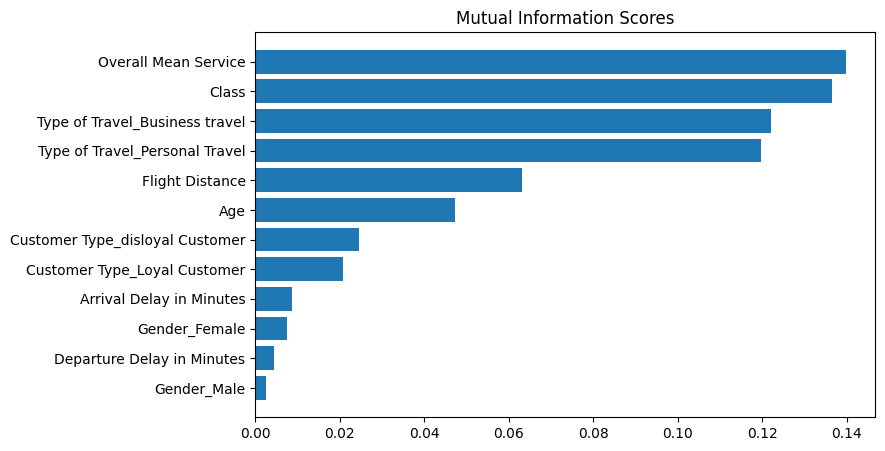

In [87]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

I valori in generali sono molto bassi:
1. La variabile Overall Mean Service si presenta come la variabile che ha una relazione più alta con il target satisfaction. Ciò significa che è la più informativa nel ridurre l'incertezza sul target.
2. La variabile Class si presenta poco sotto alla variabile Overall Mean Service. Anche essa è molto informativa nel ridurre l'incertezza sul target, quindi c'è indipendenza.
3. Poco sotto le due variabili Type of Travel_Business travel e Type of Travel_Personal Travel, conferma che il tipo di viaggio è rilevante sul target satisfaction.
4. Flight Distance e Age sono informative nel ridurre l'incertezza sul target non come le precendenti ma sono significative, con un punteggio circa di 0.07 e 0.05
5. La variabile Costumer Type è moderatamente informativa nel ridurre l'incertezza sul target, indicando che la tipologia del cliente e moderatamente significativa sulla soddisfazione del cliente
6. Al di sotto di 0.02 sono presente:
      1. Arrival Delay in Minutes
      2. Gender_Female
      3. Departure Delay in Minutes
      4. Gender_Male
  che sono poco significativi